In [7]:
from pathlib import Path
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [8]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', mpl.colormaps['Set1'](np.linspace(0,1,9)))
plt.rcParams.update({"text.usetex": True, "font.family": "Computer Modern Roman"})


In [9]:
def display_df(df):
    display(df.head(10))

# final_results - 12 Trials

In [10]:
file = Path("data/final_results_12trials_radius75.pkl")

In [11]:
N = 12

In [12]:
(parameters, constraints), fr = pickle.loads(file.read_bytes())

In [13]:
#Unique Values of Sheep, Shepherds, Neighbors

unique_sheep = list(fr.index.get_level_values('num_sheep').unique())
print('Sheep Values', unique_sheep)
unique_shepherds = list(fr.index.get_level_values('num_shepherds').unique())
print('Shepherd Values', unique_shepherds)
unique_neighbors = list(fr.index.get_level_values('num_neighbors').unique())
print('Neighbor Values', unique_neighbors)
unique_seeds = list(fr.index.get_level_values('random_seed').unique())
print('Random Seeds', unique_seeds)

Sheep Values [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]
Shepherd Values [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Neighbor Values [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Random Seeds [96642, 28142, 27728, 4141, 28457, 94010, 26836, 51814, 21668, 75447, 58114, 48466]


## Win?

In [14]:
fr_win = fr[['Win?']].copy()
fr_win_count = fr_win.groupby(level=['num_sheep', 'num_neighbors', 'num_shepherds']).agg({'Win?': 'sum'})

In [15]:
def saveFig(fig, ax, title, xlabel, ylabel, name,ylim = None):
    #Place the legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Add axis labels and a title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(fontsize=10)
    ax.set_ylim([-10, ylim])
    fig.savefig(name+".png", dpi=300, bbox_inches='tight')
    #plt.show()


num_sheep num_neighbors num_shepherds Win?  % Win
0          1             1             2   12  100.0
1         11            10             5   12  100.0
2         21            20             7   12  100.0
3         31            30             7   12  100.0
4         41            40            10   12  100.0
5         51            50            14   12  100.0
6         61            60            14   12  100.0
7         71            70            14   12  100.0
8         81            70            13   12  100.0
9         91            80            16   12  100.0
10       101            90            13   12  100.0

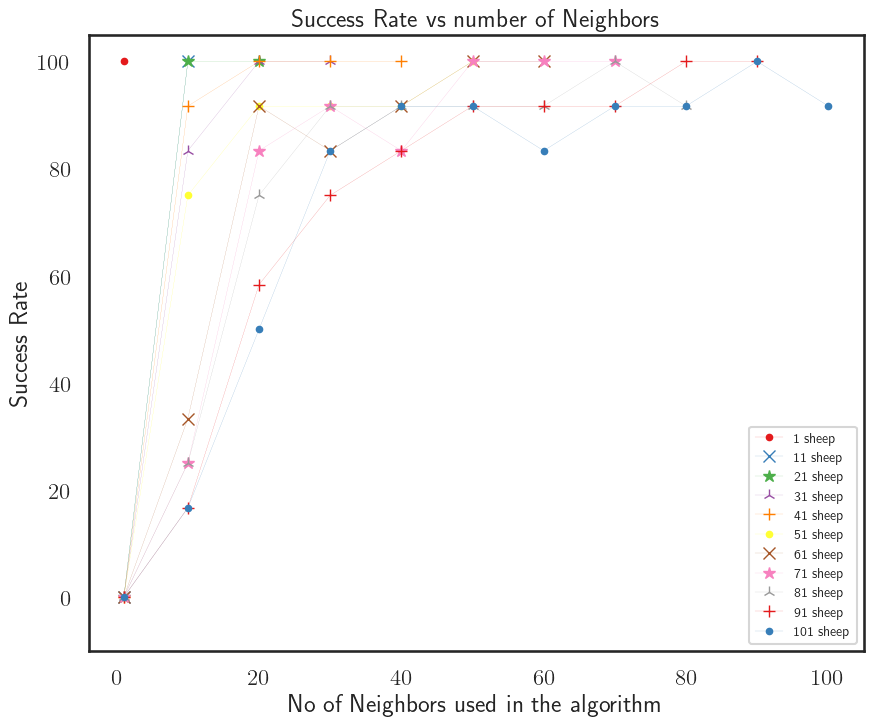

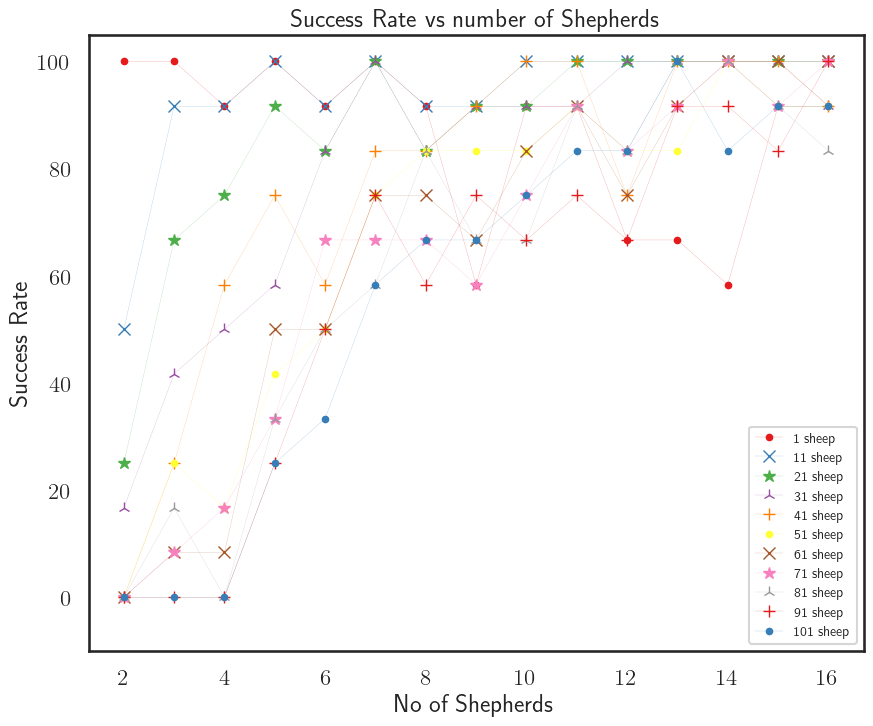

In [16]:
#gn - Group by num_neighbors
#gsd - Group by num_shepherds
#ns - num_sheep
#nsd - num_shepherds
#nn - num_neighbors

fig_gn_nn_win,ax_gn_nn = plt.subplots(figsize=(10, 8))
fig_gsd_nsd_win, ax_gsd_nsd = plt.subplots(figsize=(10, 8))
# fig_gsd_nn_win, ax_gsd_nn = plt.subplots(figsize=(10, 8))
marker_nn = itertools.cycle(('.', 'x', '*','2', '+'))
marker_shep = itertools.cycle(('.', 'x', '*','2', '+'))


optimalDF = pd.DataFrame(columns=['num_sheep', 'num_neighbors', 'num_shepherds', 'Win?', '% Win'])

for s in unique_sheep:
    subgroup = fr_win_count.loc[s, :, :]
    #display_df(subgroup)
    subgroup.reset_index(inplace=True)

    #For a unique value of num_sheep, for every unique value of neighbors, find the least num_shepherds with max Success rate
    result_neighbors = subgroup.sort_values(['Win?', 'num_shepherds','num_neighbors'], ascending=[False, True, True]).groupby('num_neighbors').first().reset_index()
    #For a unique value of num_sheep_s, for every unique value of shepherds, find the least num_neighbors with max Success rate
    result_shepherds = subgroup.sort_values(['Win?', 'num_shepherds','num_neighbors'], ascending=[False, True, True]).groupby('num_shepherds').first().reset_index()

    result_neighbors['% Win'] = (result_neighbors['Win?'] / N) * 100
    result_shepherds['% Win'] = (result_shepherds['Win?'] / N) * 100

    #print('\n\n num_sheep: ', s)
    #display(result)
    result2 = result_neighbors.sort_values(['Win?', 'num_shepherds','num_neighbors'], ascending=[False, True, True]).iloc[:1]
    #print(result2)
    new_row = pd.DataFrame({'num_sheep' : s ,
               'num_neighbors' : result2['num_neighbors'],
               'num_shepherds' : result2['num_shepherds'],
                'Win?' : result2['Win?'],
                '% Win' : result2['% Win']
    })
    optimalDF = pd.concat([optimalDF, new_row], ignore_index=True)
    #display(opt)
    #Plots by grouping num_neighbors
    ax_gn_nn.plot(result_neighbors['num_neighbors'], result_neighbors['% Win'], marker=next(marker_nn), linestyle='-', linewidth = 0.1,label =  str(s) + ' sheep')

    #Plots by grouping num_shepherds
    ax_gsd_nsd.plot(result_shepherds['num_shepherds'], result_shepherds['% Win'], marker=next(marker_shep), linestyle='-', linewidth = 0.1,label =  str(s) + ' sheep')
    # ax_gsd_nn.plot(result_shepherds['num_neighbors'], result_shepherds['% Win'], marker='.', linestyle='-', linewidth = 0.1,label =  str(s) + ' sheep')


display(optimalDF)


saveFig(fig_gn_nn_win,
        ax_gn_nn,
        title= r' Success Rate vs number of Neighbors',
        xlabel= 'No of Neighbors used in the algorithm',
        ylabel=r'Success Rate',
        name="winVsneighbors_gn")

# saveFig(fig_gsd_nn_win,
#         ax_gsd_nn,
#         title= r' Success Rate vs number of Neighbors',
#         xlabel= 'No of Neighbors used in the algorithm',
#         ylabel=r'Success Rate',
#         name="winVsneighbors_gsd")


saveFig(fig_gsd_nsd_win,
        ax_gsd_nsd,
        title= r' Success Rate vs number of Shepherds',
        xlabel= 'No of Shepherds',
        ylabel=r'Success Rate',
        name="winVsShepherds_gsd")

#plt.show()


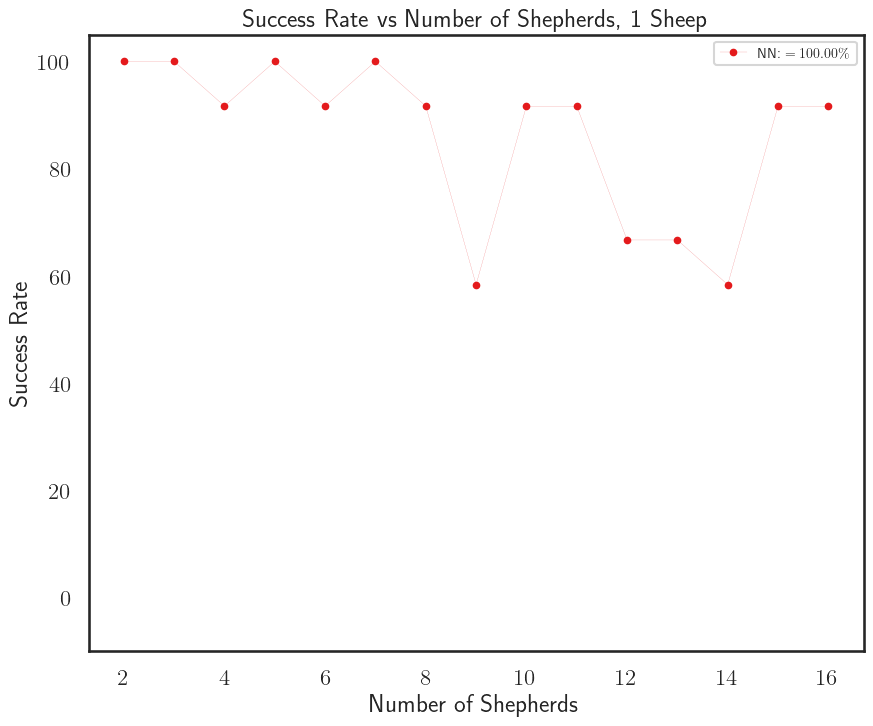

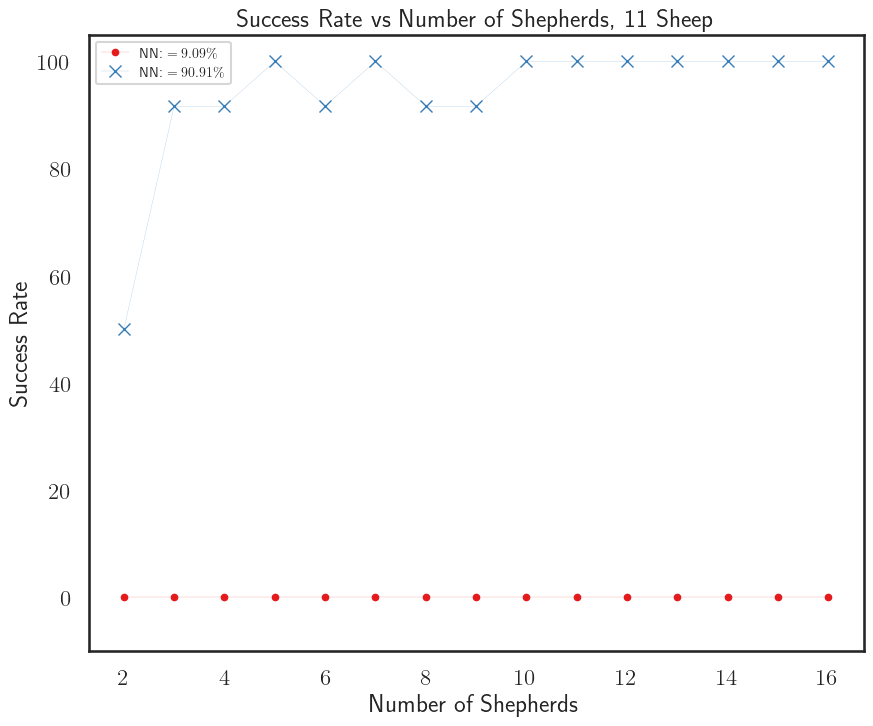

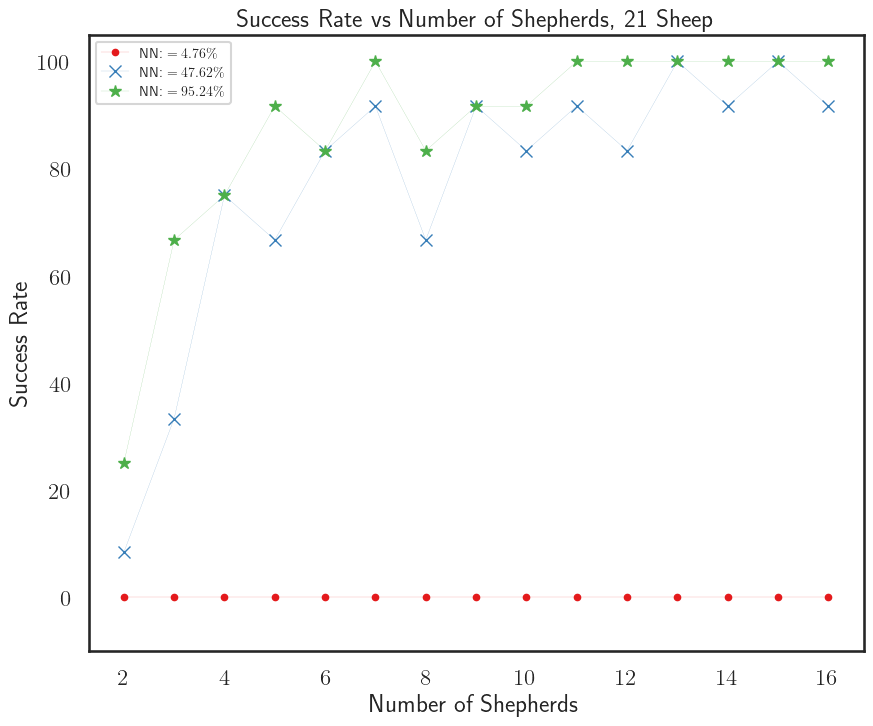

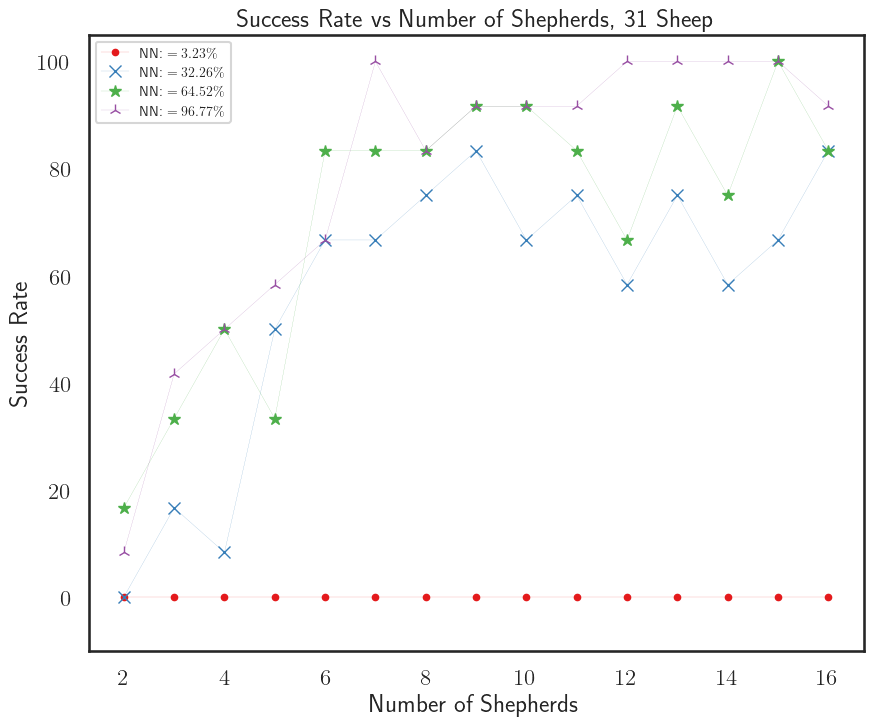

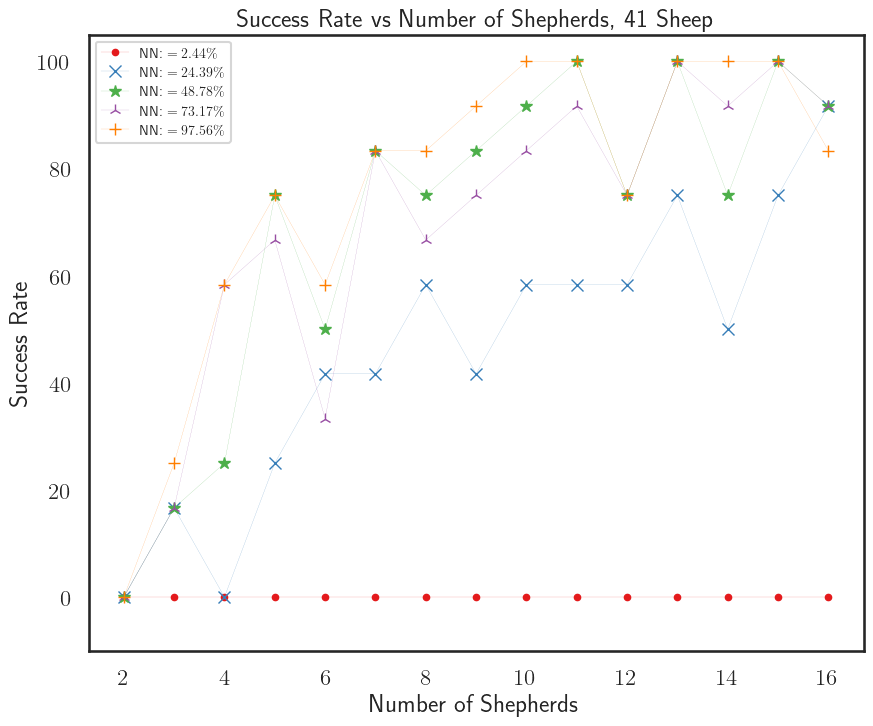

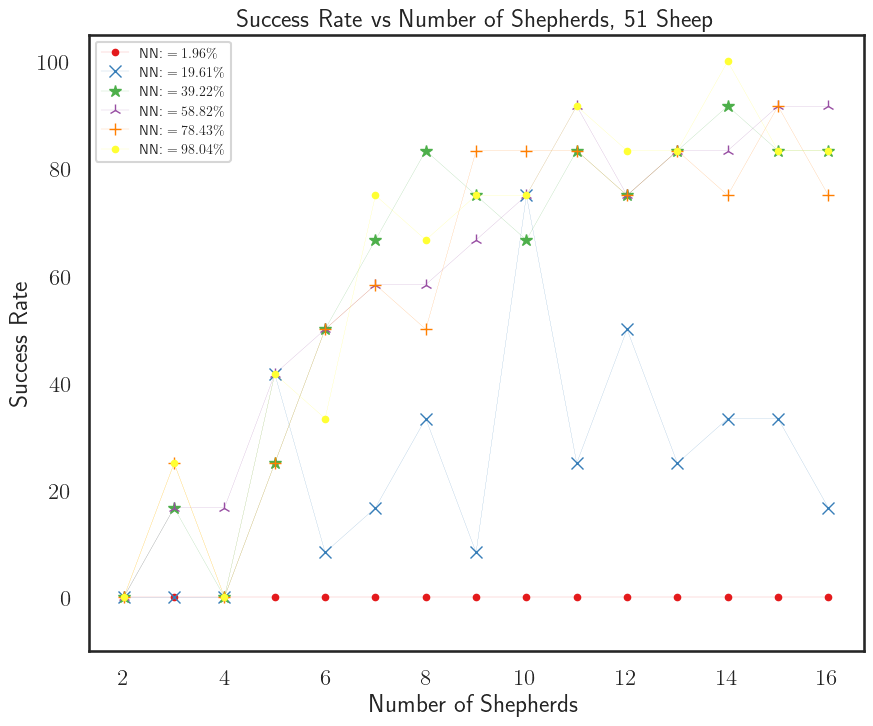

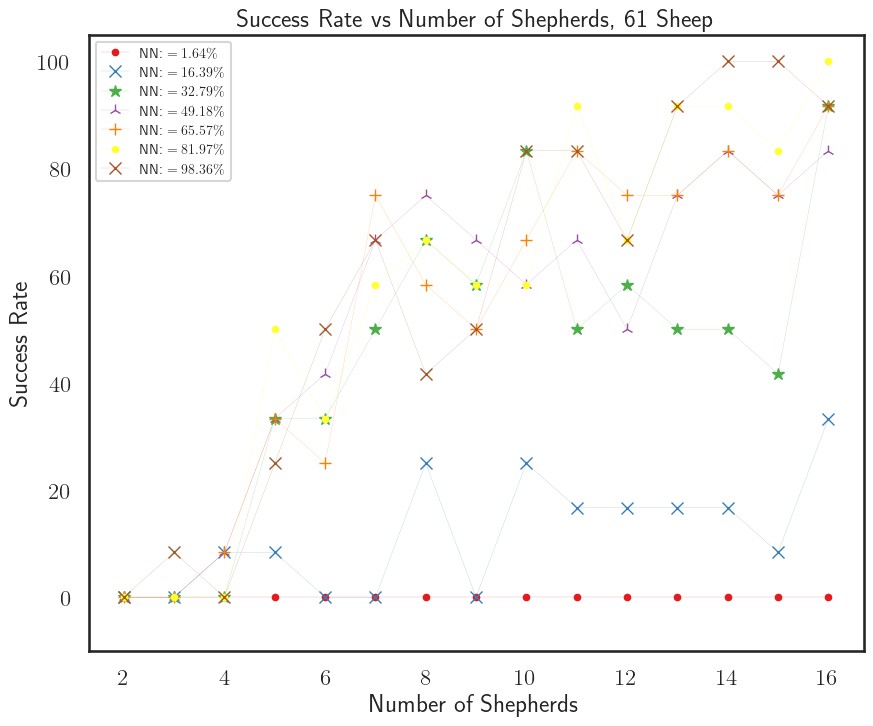

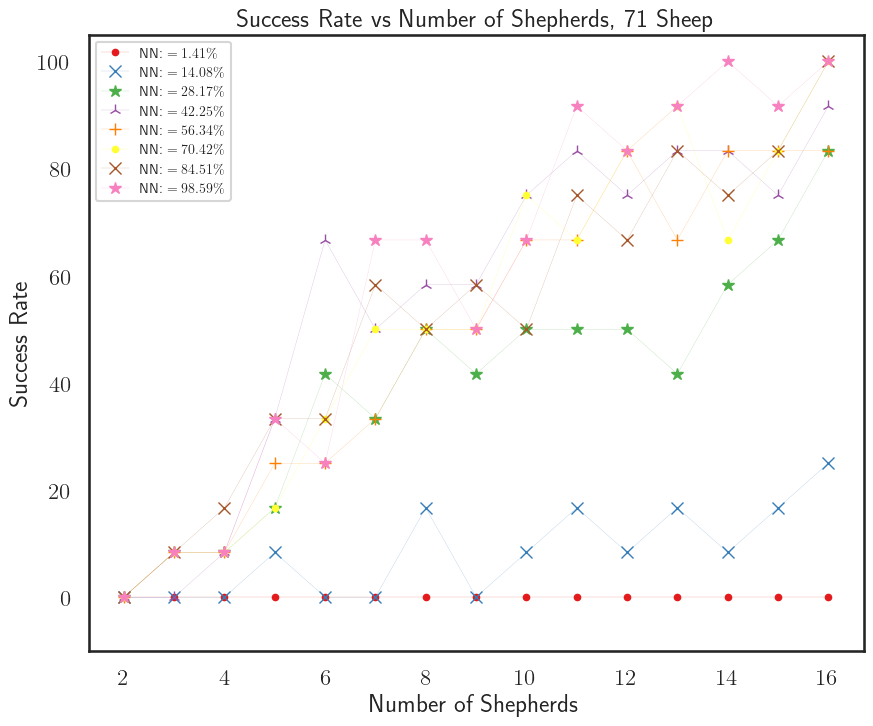

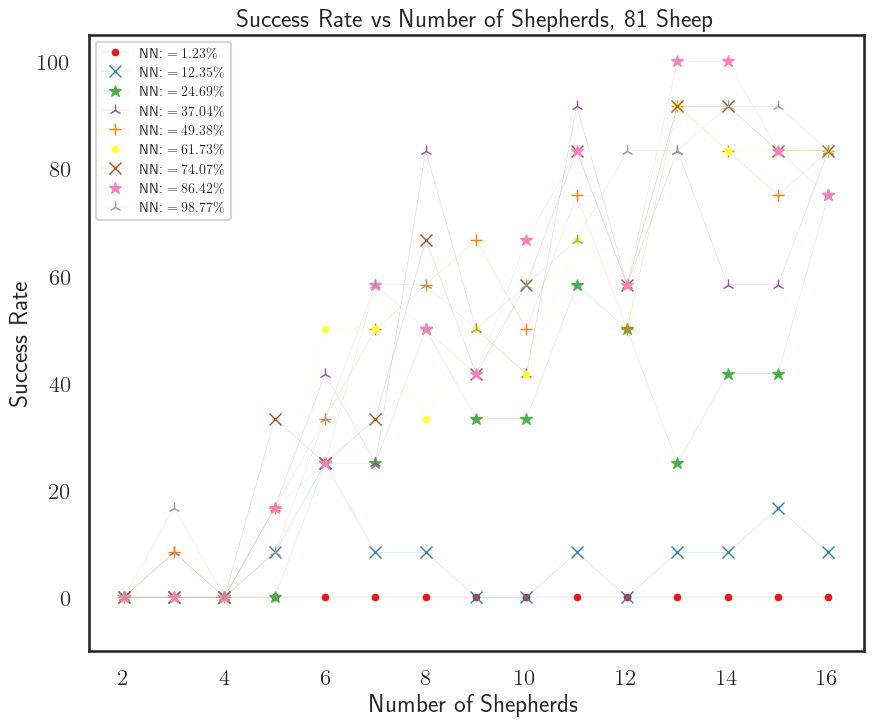

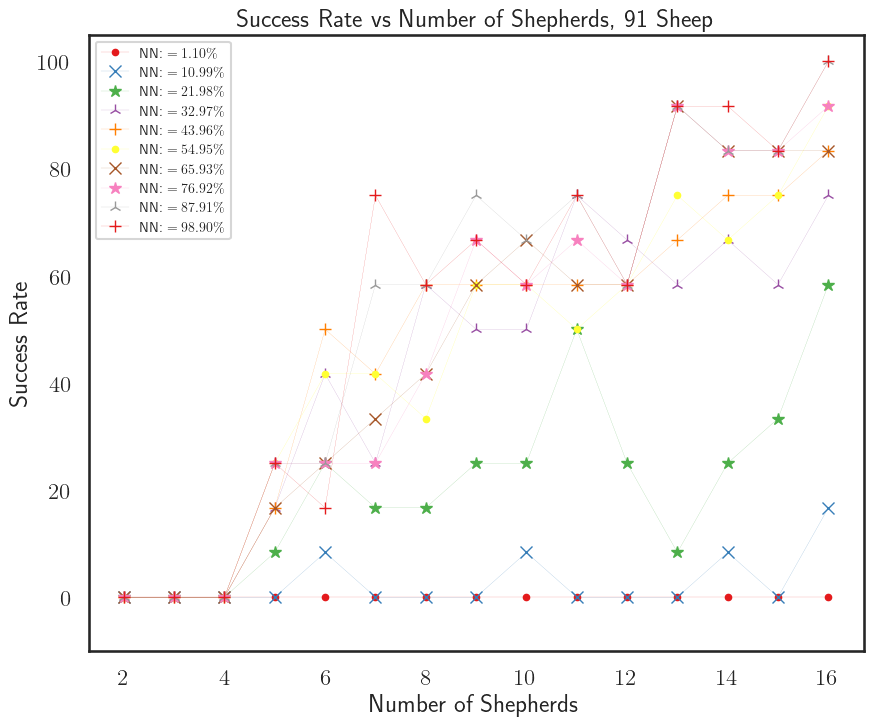

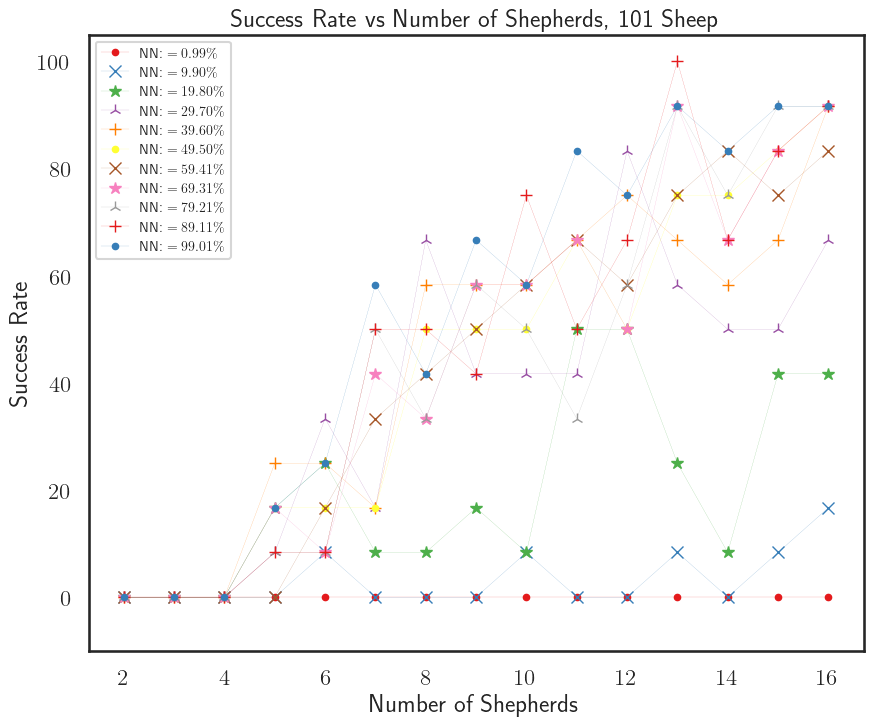

In [17]:
for s in unique_sheep:
    marker = itertools.cycle(('.', 'x', '*','2', '+'))
    fig_gsd_nn_win, ax_gsd_nn = plt.subplots(figsize=(10, 8))
    subgroup = fr_win_count.loc[s, :, :]
    subgroup.reset_index(inplace=True)
    for nn in unique_neighbors:
        sub_df = subgroup[subgroup['num_neighbors'] == nn]
        if sub_df.empty:
            continue
        win_perc = sub_df['Win?'] / N * 100
        ax_gsd_nn.plot(sub_df['num_shepherds'], win_perc, marker=next(marker), linestyle='-', linewidth = 0.1, label = f'NN: $ = {nn / s * 100:.2f}\\%$')
    saveFig(fig_gsd_nn_win,
            ax_gsd_nn,
            title= f'Success Rate vs Number of Shepherds, {s} Sheep',
            xlabel= 'Number of Shepherds',
            ylabel= r'Success Rate',
            name=f"winVsshepherds_s={s}",
            ylim=105)

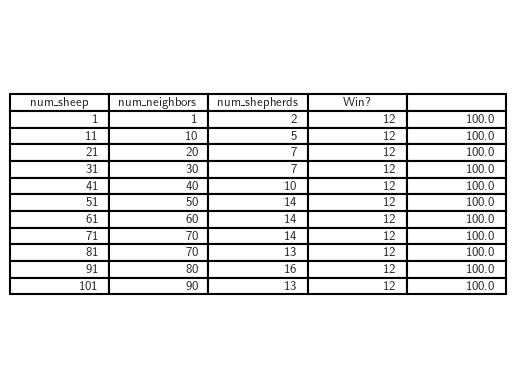

In [18]:
optimalDF.head(10)
fig, ax = plt.subplots()

# hide the axis and remove any whitespace
ax.axis('off')
ax.axis('tight')

# create the table and add it to the axis
table = ax.table(cellText=optimalDF.values, colLabels=optimalDF.columns, loc='center')


fig.savefig('optimal_ns_nn_nsd_win.png')

## Final Tick

In [19]:
fr_time = fr[['Win?', 'Final tick']].copy()
fr_time_count= fr_time[fr_time['Win?'] == True].groupby(level=['num_sheep', 'num_neighbors', 'num_shepherds']).agg({'Win?': 'sum', 'Final tick': 'sum'})
fr_time_count['Time Taken'] = fr_time_count['Final tick'] / fr_time_count['Win?']

In [20]:
print(fr_time_count.head(30))

                                       Win?  Final tick   Time Taken
num_sheep num_neighbors num_shepherds                               
1         1             2                12        4305   358.750000
                        3                12        4271   355.916667
                        4                11        3747   340.636364
                        5                12        5086   423.833333
                        6                11        3902   354.727273
                        7                12        4300   358.333333
                        8                11        4649   422.636364
                        9                 7        2062   294.571429
                        10               11        3892   353.818182
                        11               11        4747   431.545455
                        12                8        3365   420.625000
                        13                8        2813   351.625000
                        14        

In [21]:
display(fr_time.loc[31,10,5])
display(fr_time_count.loc[31,10,5])
sdf = fr_time_count[fr_time_count['Time Taken']>5999]
sdf.head(10)

Win?  Final tick
random_seed                   
96642         True        5177
28142        False        6000
27728         True         476
4141          True         753
28457        False        6000
94010        False        6000
26836        False        6000
51814         True        3019
21668        False        6000
75447        False        6000
58114         True         778
48466         True         396

Win?              6.0
Final tick    10599.0
Time Taken     1766.5
Name: (31, 10, 5), dtype: float64

Empty DataFrame
Columns: [Win?, Final tick, Time Taken]
Index: []

num_sheep num_neighbors num_shepherds  Time Taken Success Rate
0          1             1             9  294.571429    58.333333
1         11            10            14  403.666667        100.0
2         21            20            16  419.750000        100.0
3         31            30            16  379.909091    91.666667
4         41            40            16  412.300000    83.333333
5         51            50            16  412.900000    83.333333
6         61            10             5  461.000000     8.333333
7         71            10             5  460.000000     8.333333
8         81            80             5  427.000000     8.333333
9         91            20             5  439.000000     8.333333
10       101            30             5  428.000000     8.333333

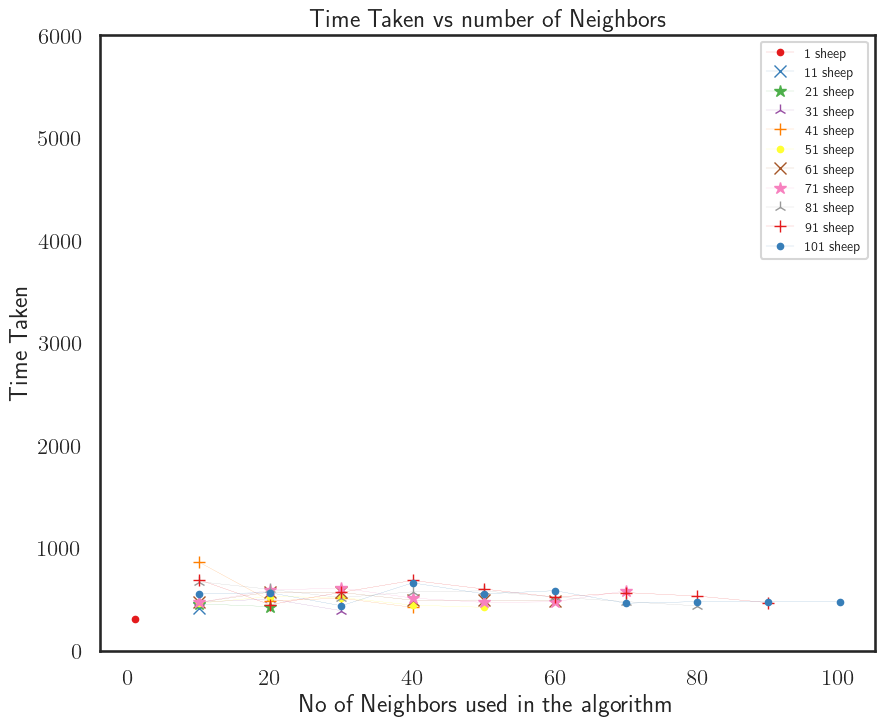

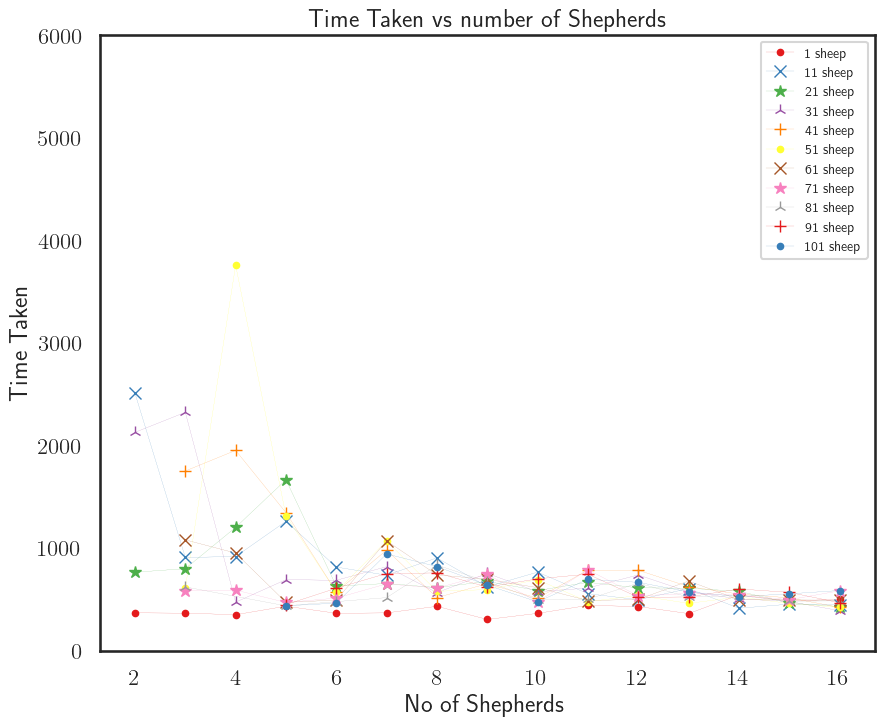

In [22]:
#gn - Group by num_neighbors
#gsd - Group by num_shepherds
#ns - num_sheep
#nsd - num_shepherds
#nn - num_neighbors
#tt - time taken


fig_gn_nn_tt,ax_gn_nn = plt.subplots(figsize=(10, 8))
fig_gsd_nsd_tt, ax_gsd_nsd = plt.subplots(figsize=(10, 8))
#fig_gsd_nn_tt, ax_gsd_nn = plt.subplots(figsize=(10, 8))

marker_nn = itertools.cycle(('.', 'x', '*','2', '+'))
marker_shep = itertools.cycle(('.', 'x', '*','2', '+'))

optimalDF_tt = pd.DataFrame(columns=['num_sheep', 'num_neighbors', 'num_shepherds', 'Time Taken', 'Success Rate'])
for s in unique_sheep:
    subgroup = fr_time_count.loc[s, :, :]
    #display_df(subgroup)
    subgroup.reset_index(inplace=True)

    #For a unique value of num_sheep, for every unique value of neighbors, find the num_shepherds with min Time Taken
    result_neighbors = subgroup.sort_values(['Time Taken', 'num_shepherds','num_neighbors'], ascending=[True, True, True]).groupby('num_neighbors').first().reset_index()
    #For a unique value of num_sheep_s, for every unique value of shepherds, find the num_neighbors with min Time Taken
    result_shepherds = subgroup.sort_values(['Time Taken', 'num_shepherds','num_neighbors'], ascending=[True, True, True]).groupby('num_shepherds').first().reset_index()

    #print('\n\n num_sheep: ', s)
    #display(result)
    result2 = result_neighbors.sort_values(['Time Taken', 'num_shepherds','num_neighbors'], ascending=[True, True, True]).iloc[:1]
    #print(result2)
    new_row = pd.DataFrame({'num_sheep' : s ,
                            'num_neighbors' : result2['num_neighbors'],
                            'num_shepherds' : result2['num_shepherds'],
                            'Time Taken' : result2['Time Taken'],
                            'Success Rate' : result2['Win?']
                            })
    optimalDF_tt = pd.concat([optimalDF_tt, new_row], ignore_index=True)
    #display(opt)
    #Plots by grouping num_neighbors
    ax_gn_nn.plot(result_neighbors['num_neighbors'], result_neighbors['Time Taken'], marker= next(marker_nn), linestyle='-', linewidth = 0.1,label =  str(s) + ' sheep')

    #Plots by grouping num_shepherds
    ax_gsd_nsd.plot(result_shepherds['num_shepherds'], result_shepherds['Time Taken'], marker=next(marker_shep), linestyle='-', linewidth = 0.1,label =  str(s) + ' sheep')
    # ax_gsd_nn.plot(result_shepherds['num_neighbors'], result_shepherds['Time Taken'], marker='.', linestyle='-', linewidth = 0.1,label =  str(s) + ' number of sheep')

optimalDF_tt['Success Rate'] = optimalDF_tt['Success Rate'] / 12 * 100
display(optimalDF_tt)


saveFig(fig_gn_nn_tt,
        ax_gn_nn,
        title= r' Time Taken vs number of Neighbors',
        xlabel= 'No of Neighbors used in the algorithm',
        ylabel=r'Time Taken',
        name="timetakenVsneighbors_gn",
        ylim= 6000)

# saveFig(fig_gsd_nn_tt,
#         ax_gsd_nn,
#         title= r' Time Taken vs number of Neighbors',
#         xlabel= 'No of Neighbors used in the algorithm',
#         ylabel=r'Time Taken',
#         name="timetakenVsneighbors_gsd")


saveFig(fig_gsd_nsd_tt,
        ax_gsd_nsd,
        title= r'Time Taken vs number of Shepherds',
        xlabel= 'No of Shepherds',
        ylabel=r'Time Taken',
        name="timetakenVsShepherds_gsd",
        ylim=6000)



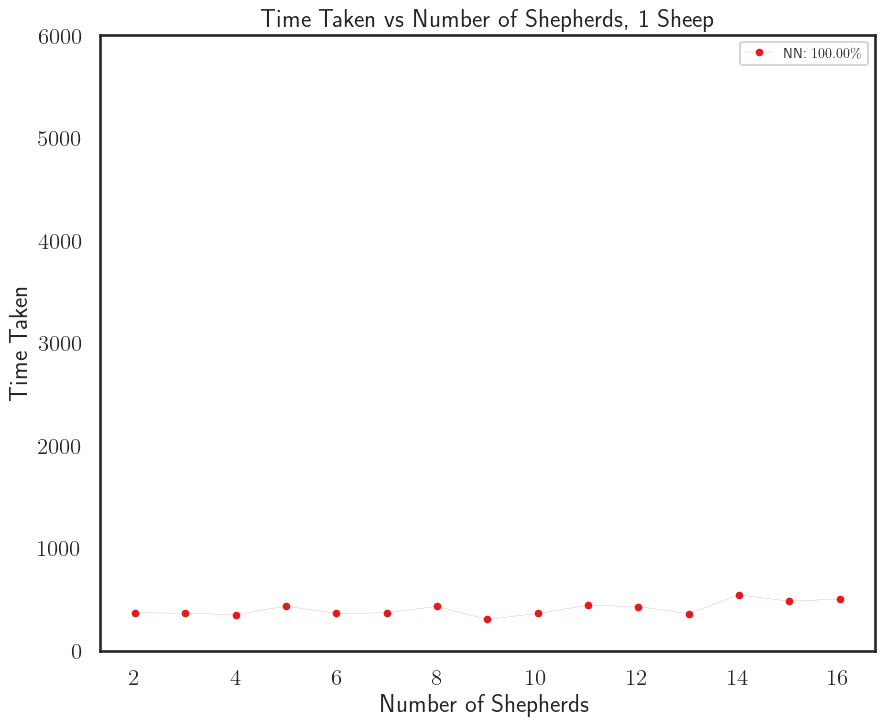

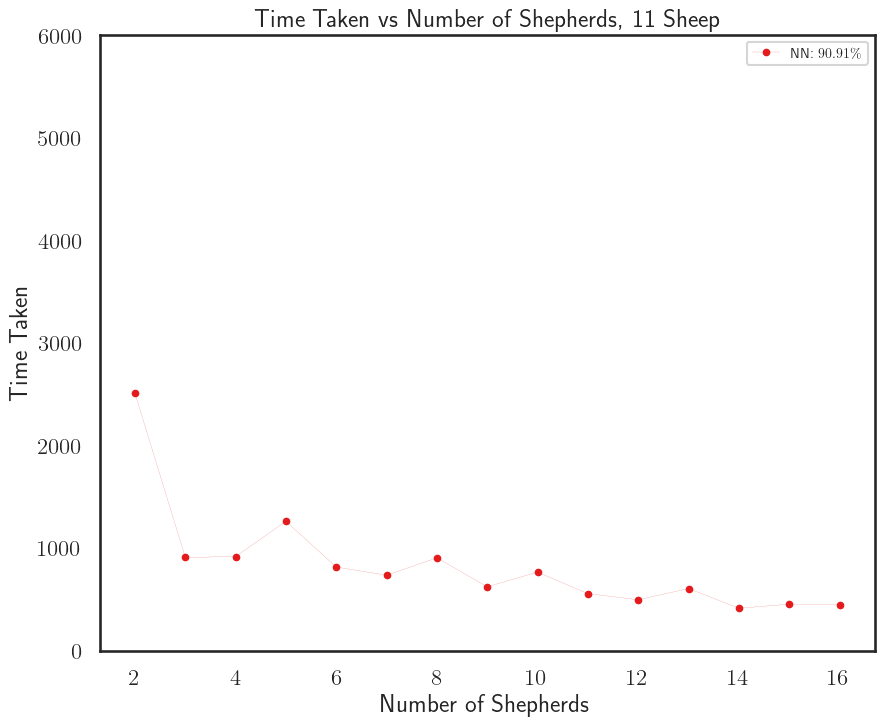

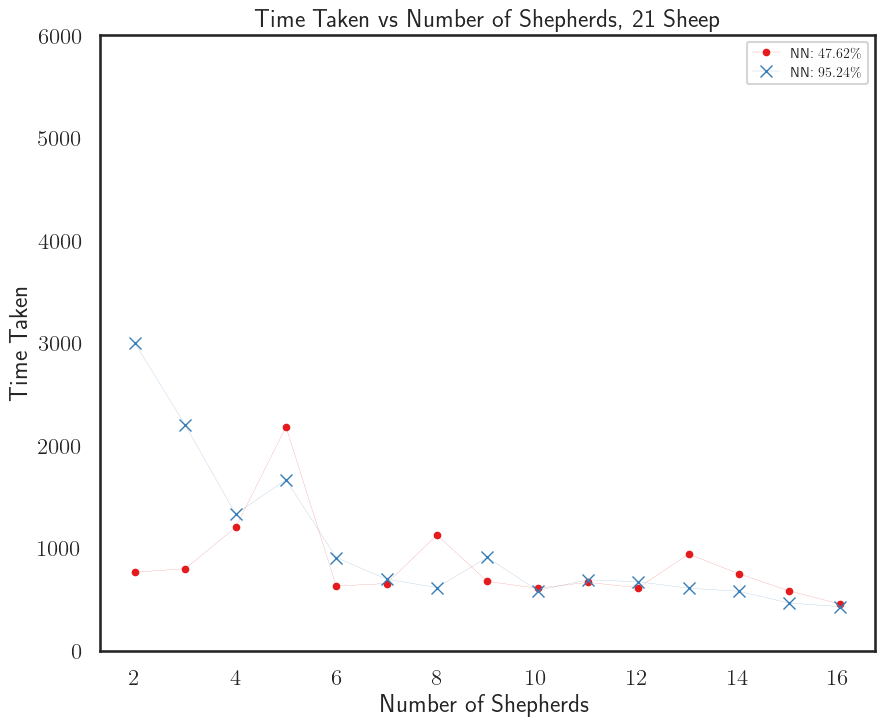

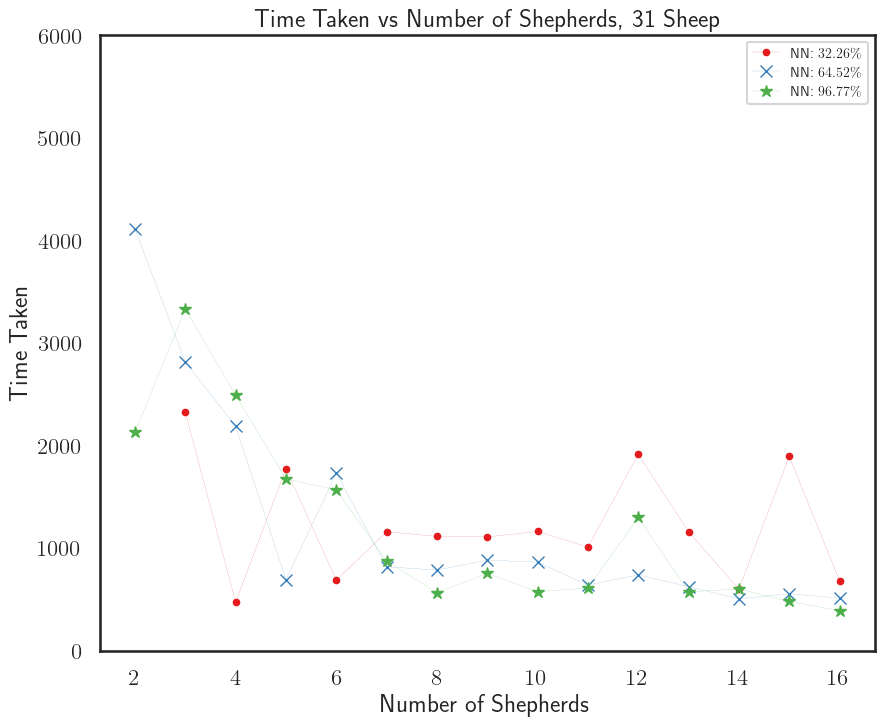

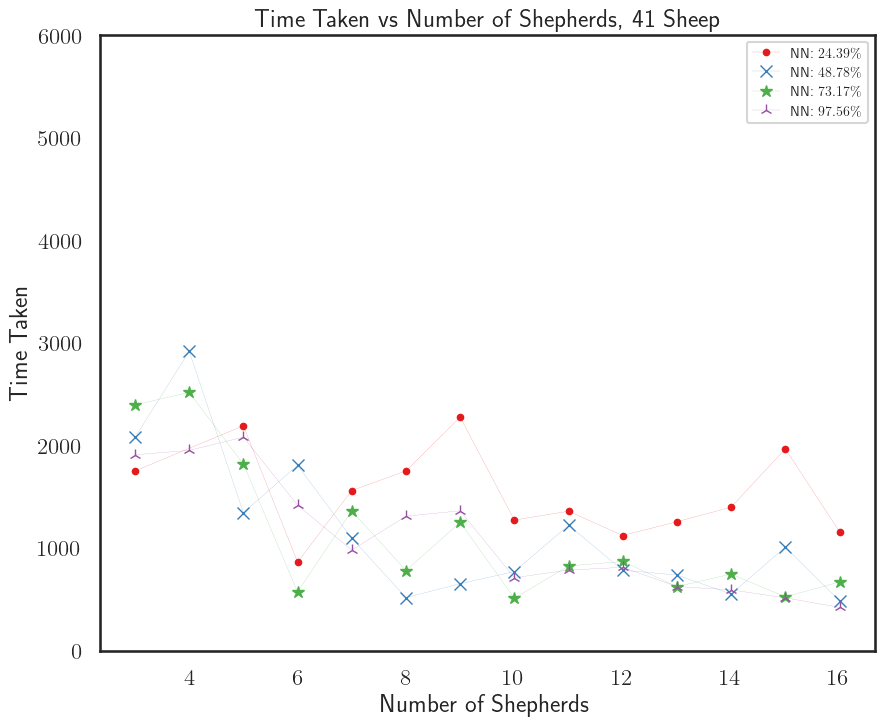

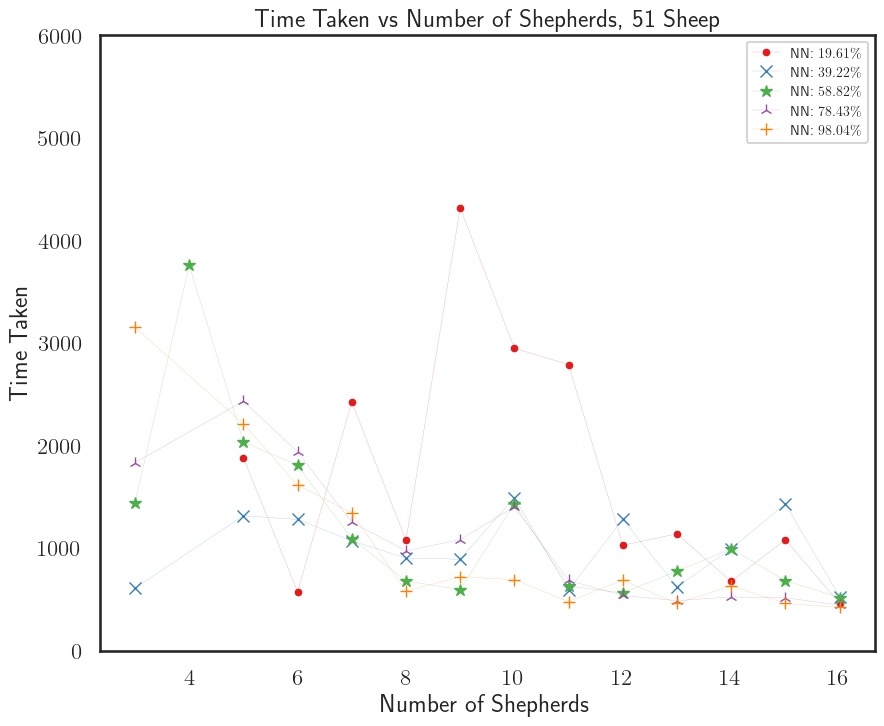

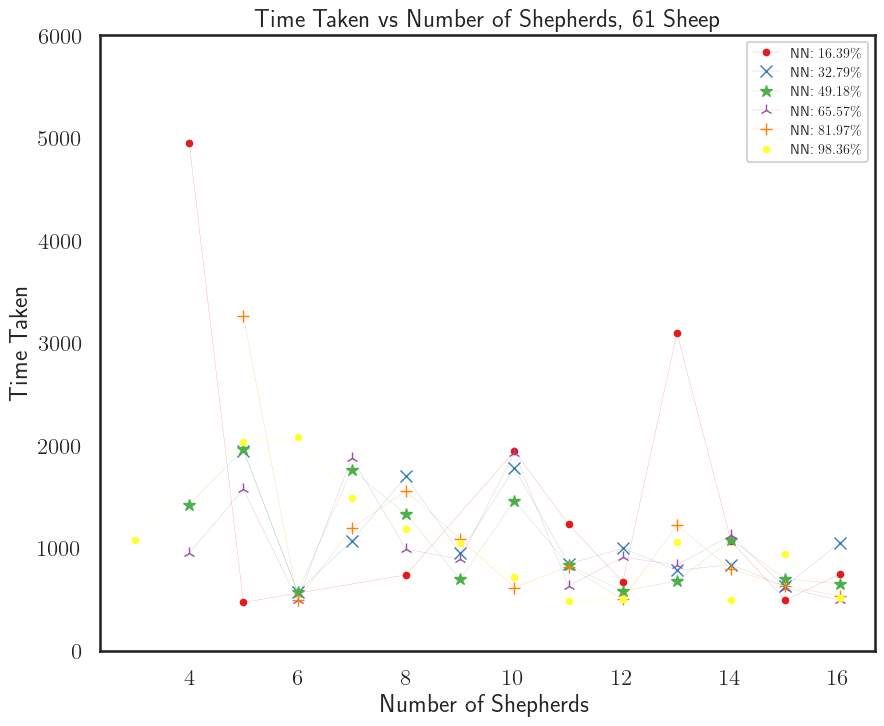

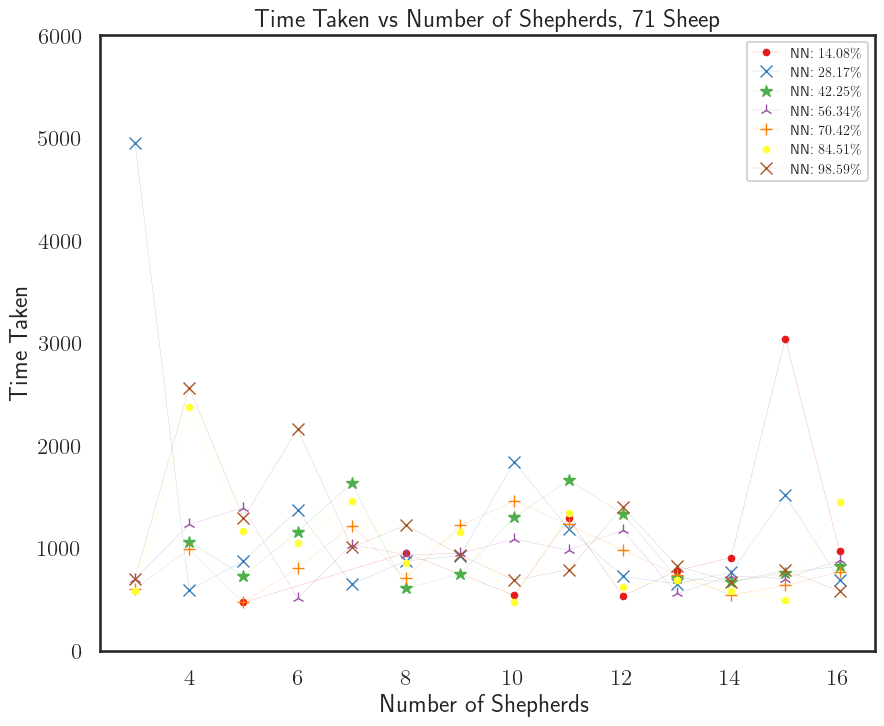

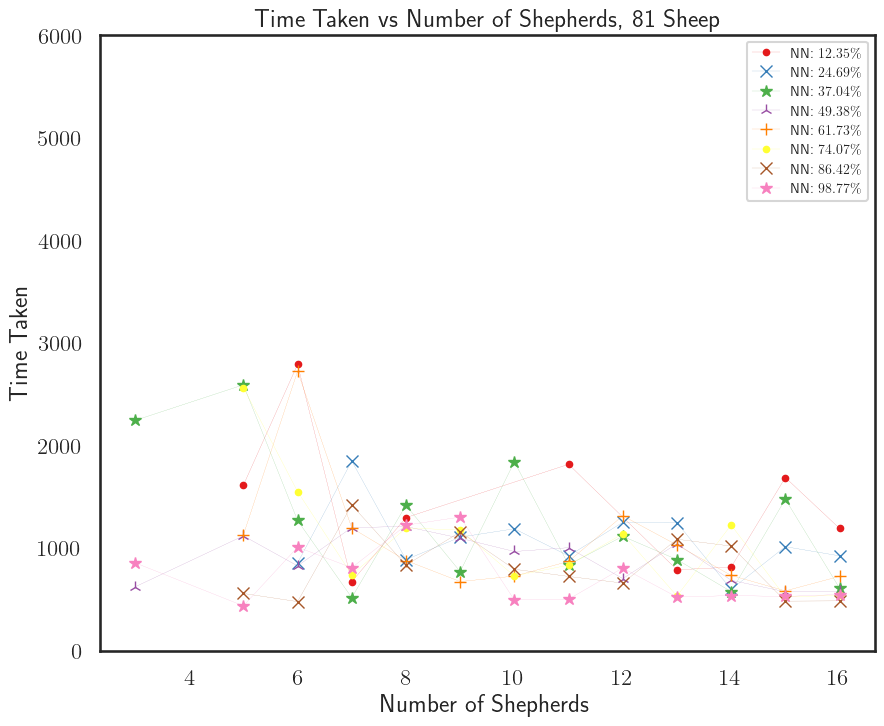

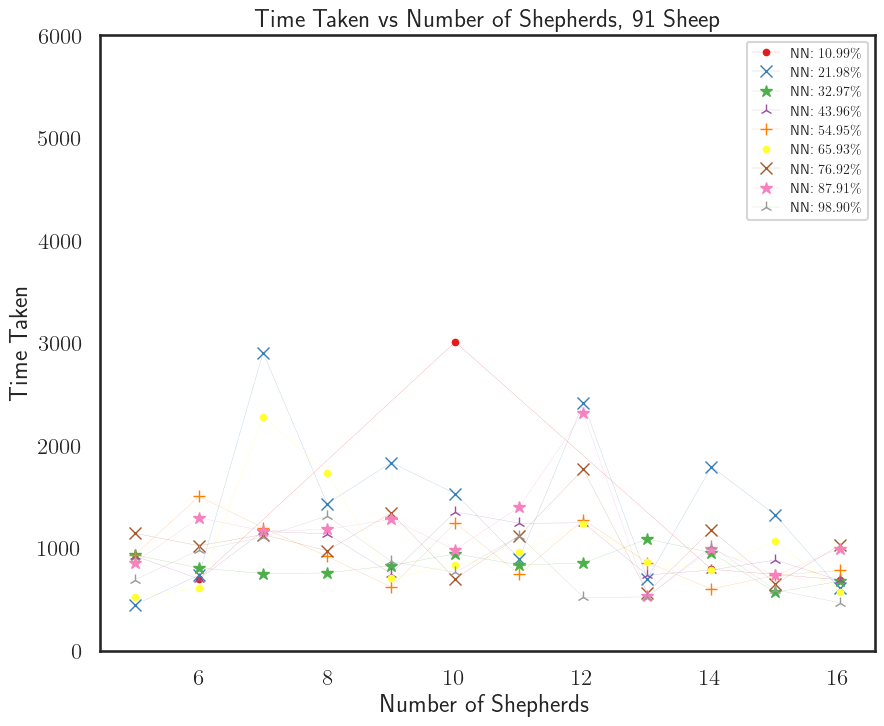

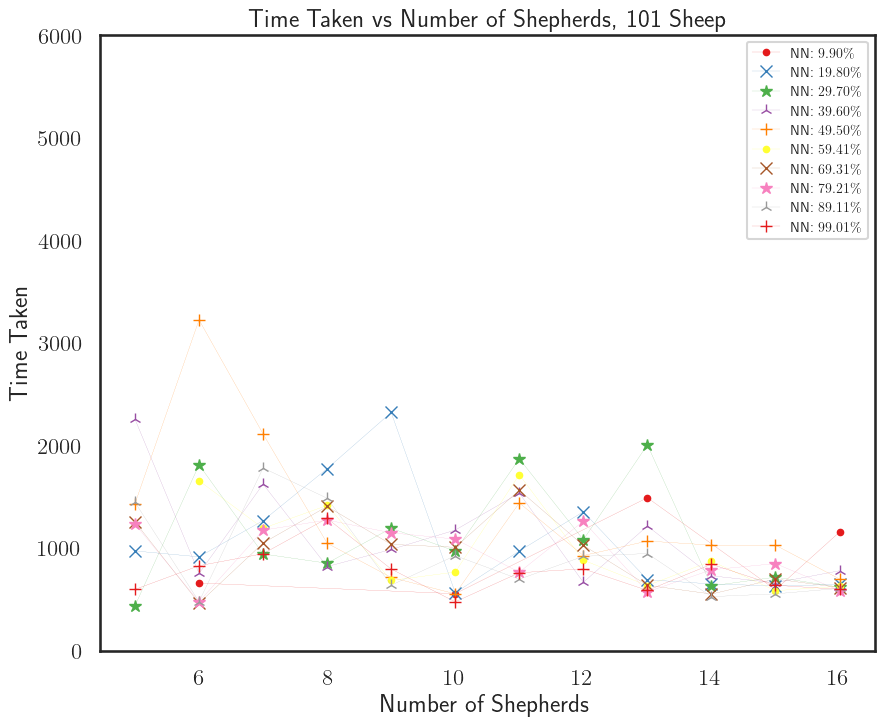

In [23]:
for s in unique_sheep:
    marker = itertools.cycle(('.', 'x', '*','2', '+'))
    fig_gsd_nn_tt, ax_gsd_tt = plt.subplots(figsize=(10, 8))
    subgroup = fr_time_count.loc[s, :, :]
    subgroup.reset_index(inplace=True)
    for nn in unique_neighbors:
        sub_df = subgroup[subgroup['num_neighbors'] == nn]
        if sub_df.empty:
            continue
        ax_gsd_tt.plot(sub_df['num_shepherds'], sub_df['Time Taken'], marker=next(marker), linestyle='-', linewidth = 0.1, label = f'NN: $ {nn / s * 100:.2f}\\%$')
    saveFig(fig_gsd_nn_tt,
            ax_gsd_tt,
            title= f'Time Taken vs Number of Shepherds, {s} Sheep',
            xlabel= 'Number of Shepherds',
            ylabel= r'Time Taken',
            name=f"winVsshepherds_s_tt={s}",
            ylim = 6000)

# results.pkl file - Just for 4 ticks

In [24]:
file2 = Path("data/results.pkl")

In [25]:
(parameters, constraints), fr2, tr = pickle.loads(file2.read_bytes())

In [26]:
#Unique Values of Sheep, Shepherds, Neighbors

unique_sheep = list(fr.index.get_level_values('num_sheep').unique())
print('Sheep Values', unique_sheep)
unique_shepherds = list(fr.index.get_level_values('num_shepherds').unique())
print('Shepherd Values', unique_shepherds)
unique_neighbors = list(fr.index.get_level_values('num_neighbors').unique())
print('Neighbor Values', unique_neighbors)

Sheep Values [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]
Shepherd Values [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Neighbor Values [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [27]:
print(list(tr.columns))

['Tick', 'Average Spread', 'Max Spread', 'GCM Distance from Goal', 'Average Distance from Goal']


In [28]:
print(list(fr2.columns))

['Final tick', 'Win?', 'Final Average Spread', 'Final Max Spread', 'Final GCM Distance from Goal', 'Final Average Distance from Goal']


In [29]:
def getGroupByIndex(df, num_sheep, num_neighbors, num_shepherds):
    group = df.loc[num_sheep, num_neighbors, num_shepherds]
    return group

In [30]:
def plotFlowTimeGraph(df, num_sheep, num_neighbors, num_shepherds, columnToBePlotted):
    g = df.droplevel(level=[1])
    #print(g.head(10))
    unique_seeds = list(df.index.get_level_values('random_seed').unique())
    #print(g.columns)
    #print(unique_seeds)
    fig,ax = plt.subplots(figsize=(5, 4))
    for seed in unique_seeds:
        group = g.loc[seed]
        #print(group.head(10))
        #print(group['Tick'].min(), group['Tick'].max())
        ax.plot(group['Tick'], group[columnToBePlotted], marker= next(marker), markersize = 0.1)
    unique_name = columnToBePlotted+ "_" + str(num_sheep) + "_" + str(num_neighbors)+ "_" + str(num_shepherds)
    saveFig(fig,ax,unique_name,"Time",columnToBePlotted,unique_name)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Error in callback <function _draw_all_if_interactive at 0x000002859A8FCAF0> (for post_execute):


KeyboardInterrupt: 

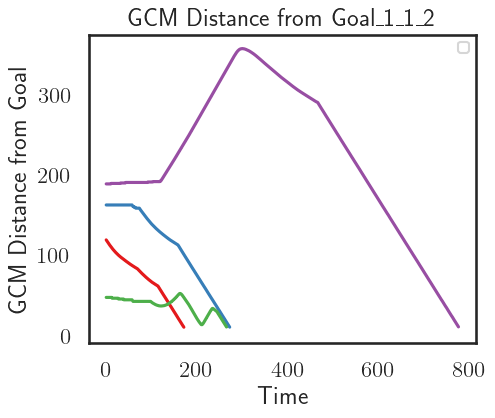

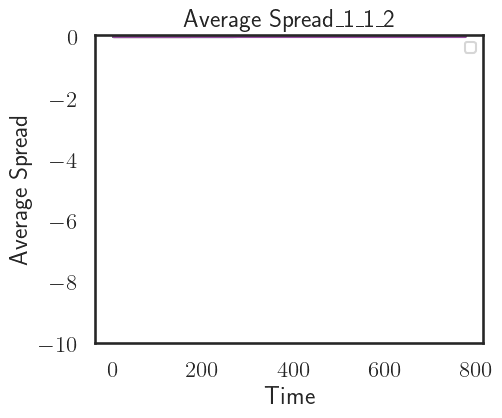

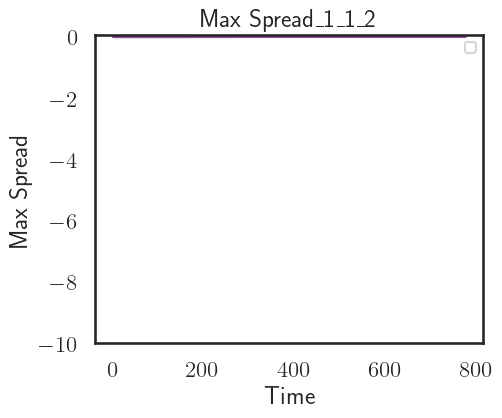

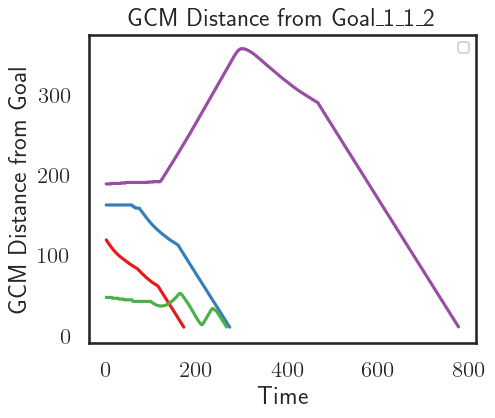

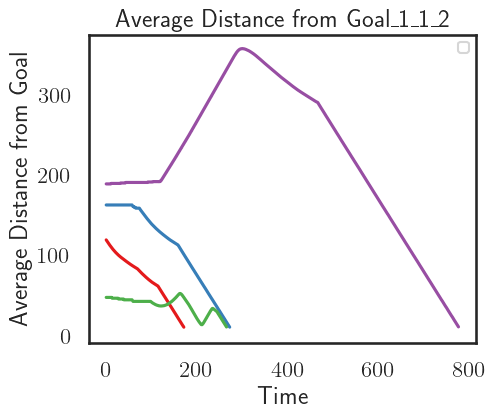

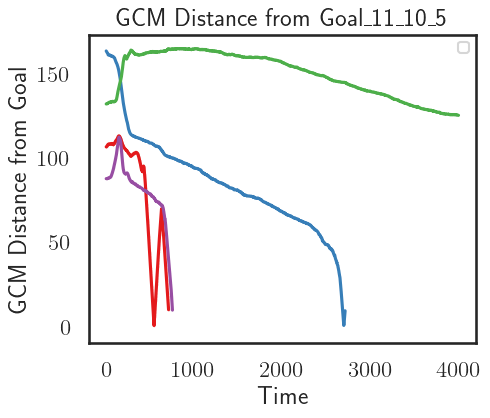

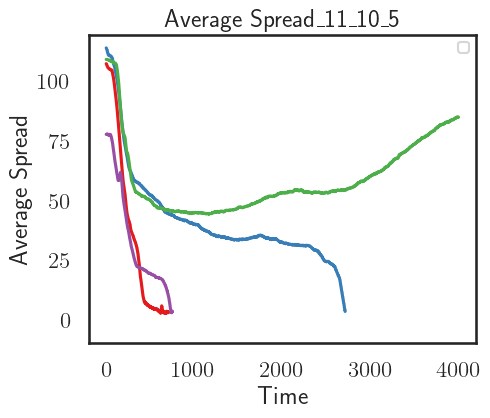

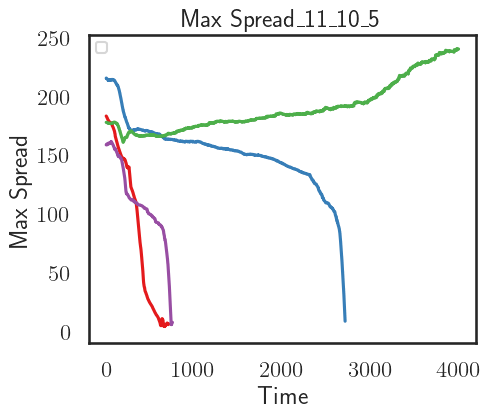

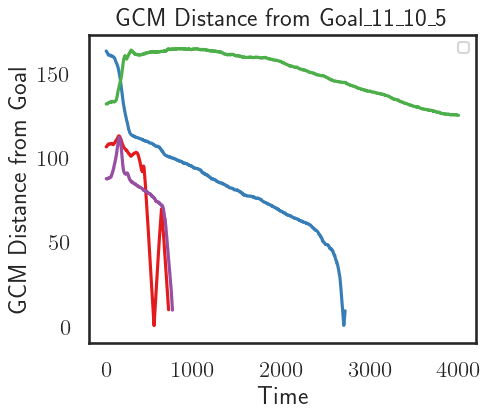

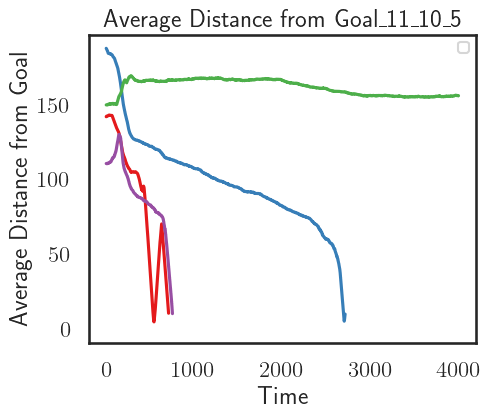

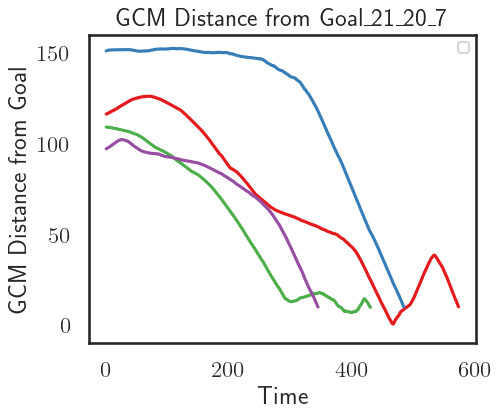

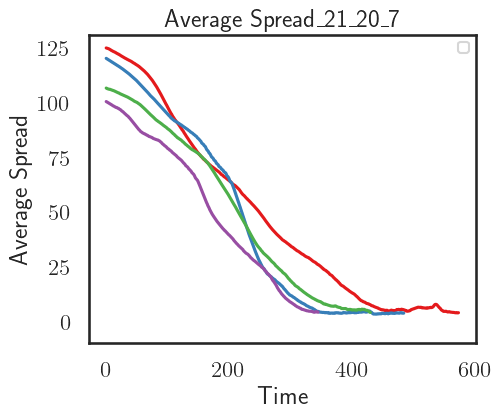

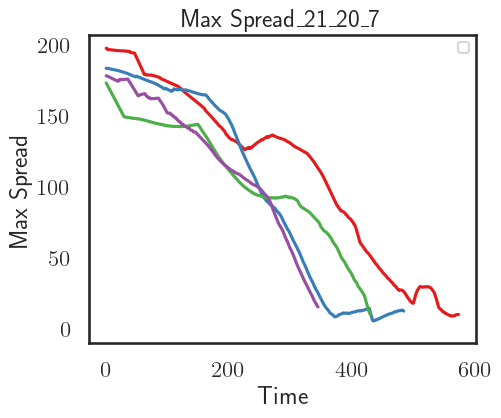

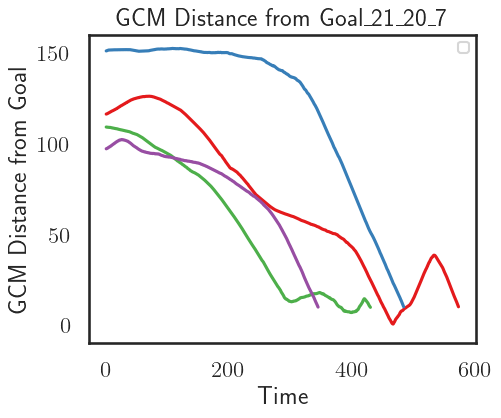

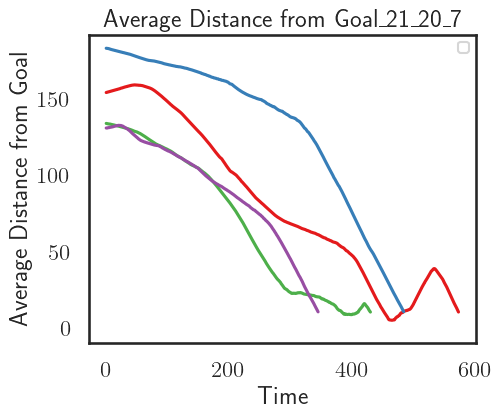

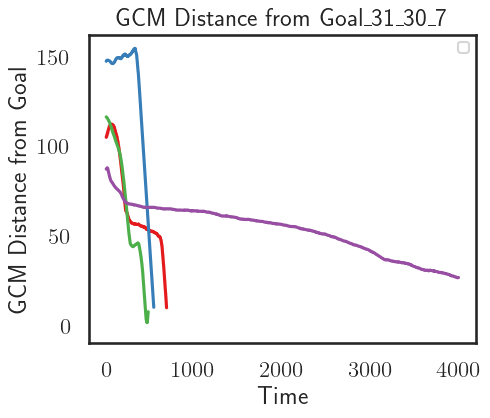

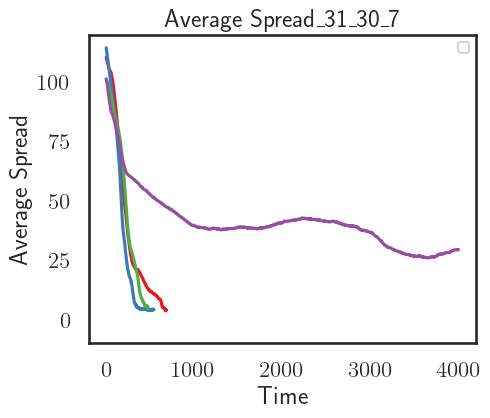

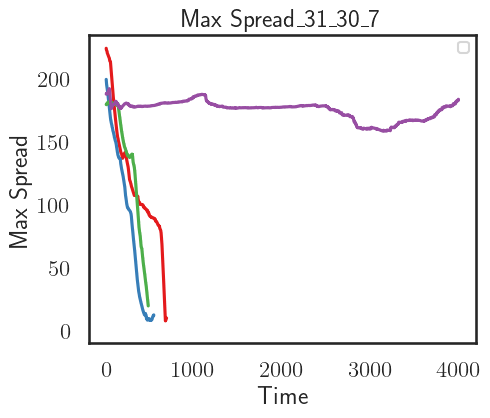

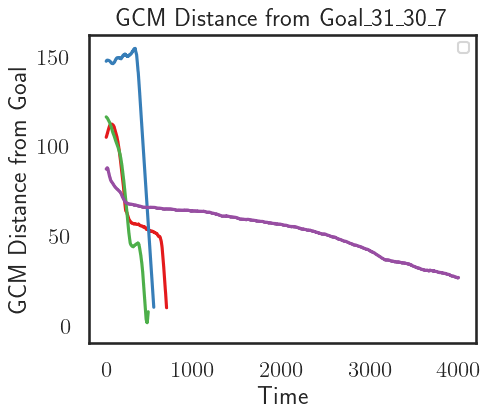

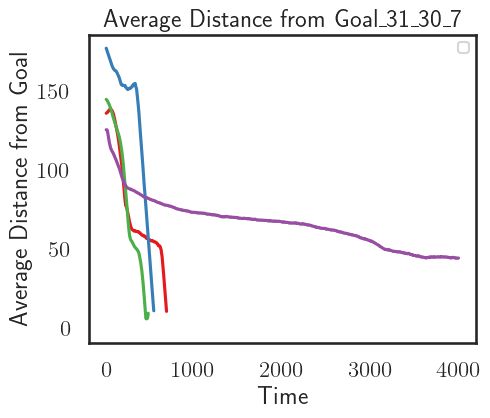

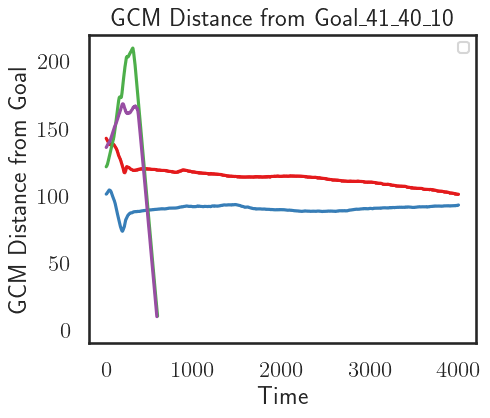

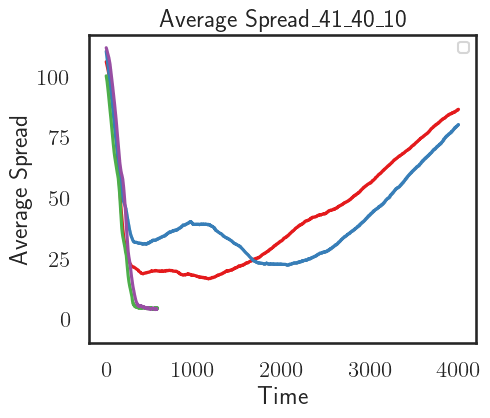

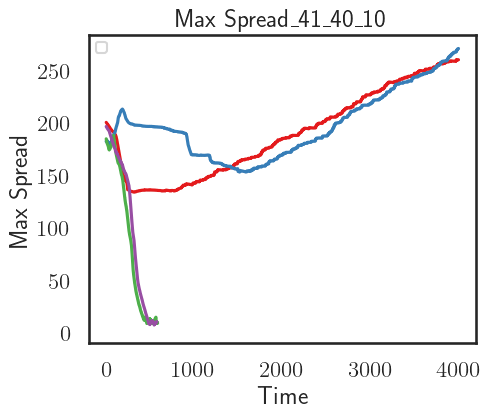

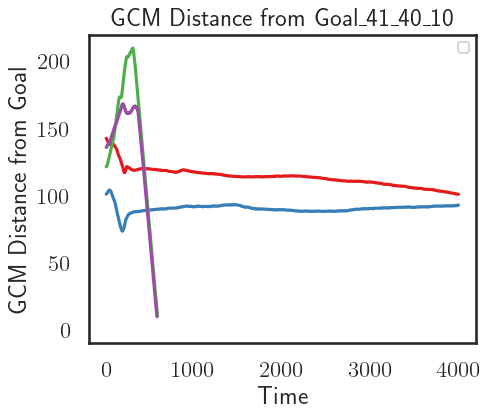

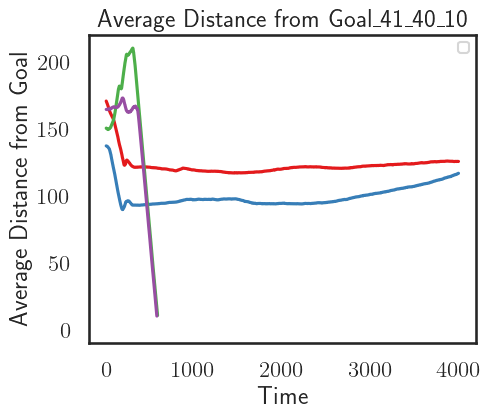

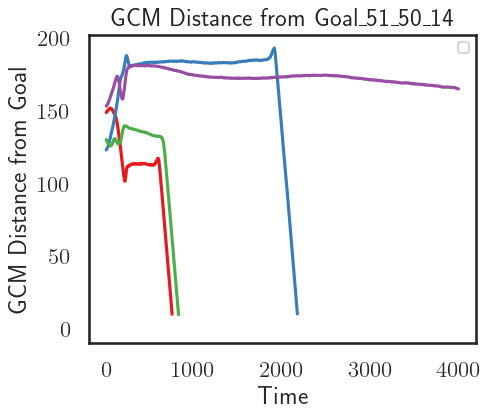

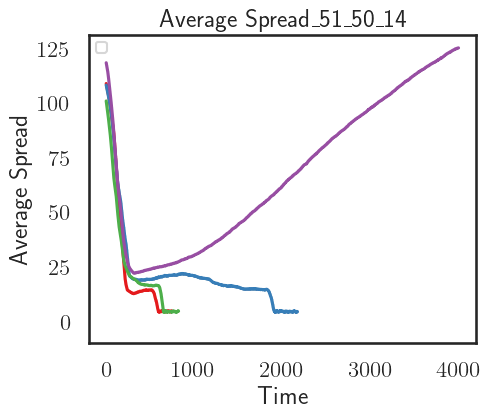

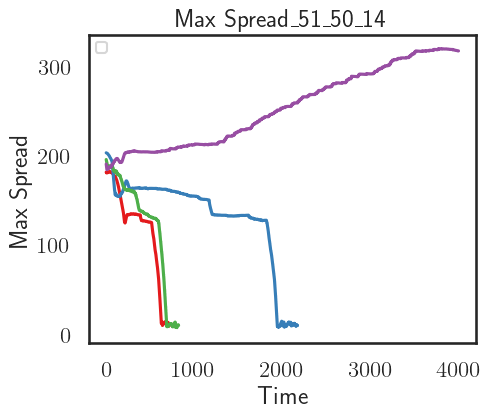

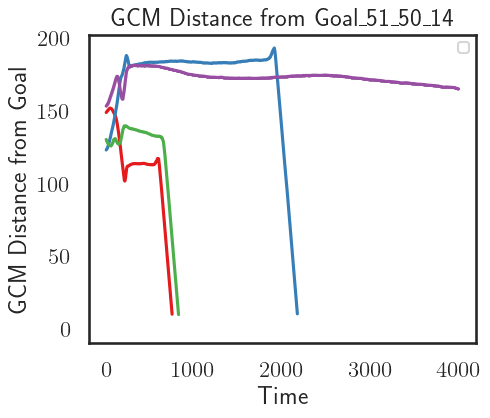

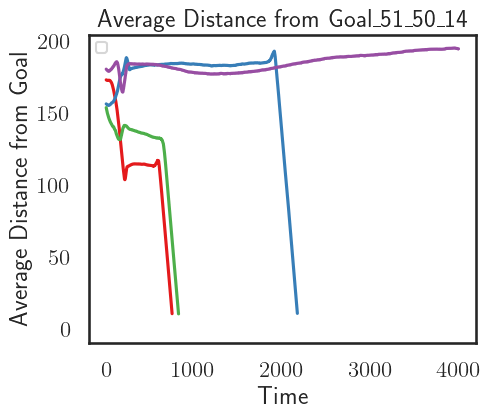

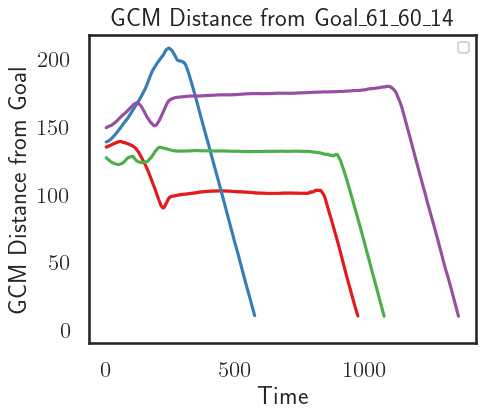

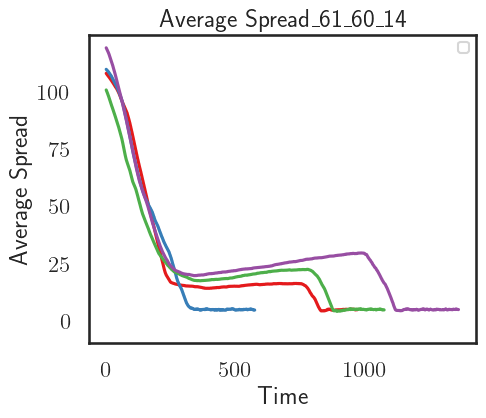

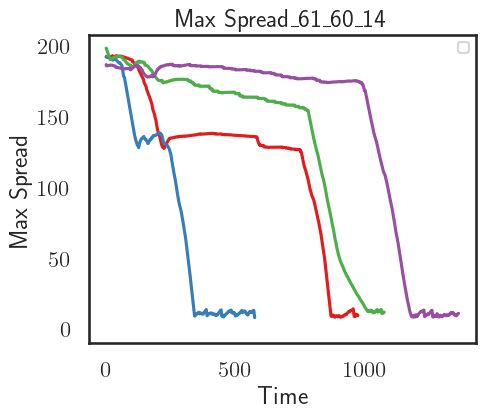

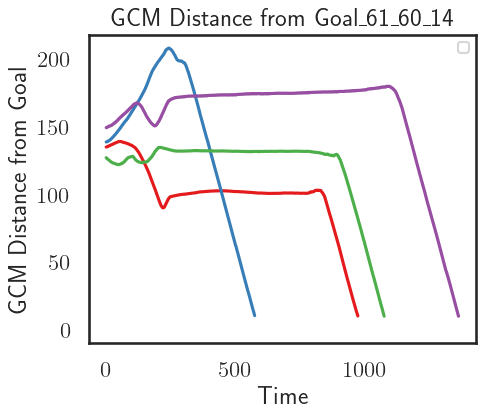

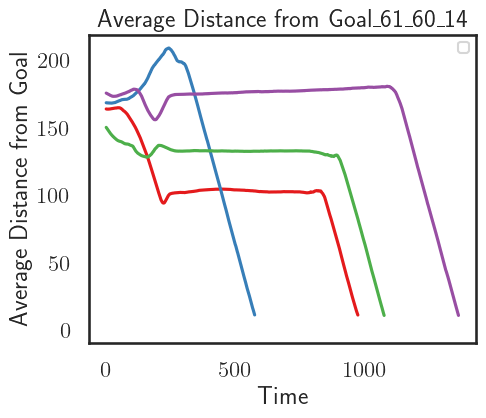

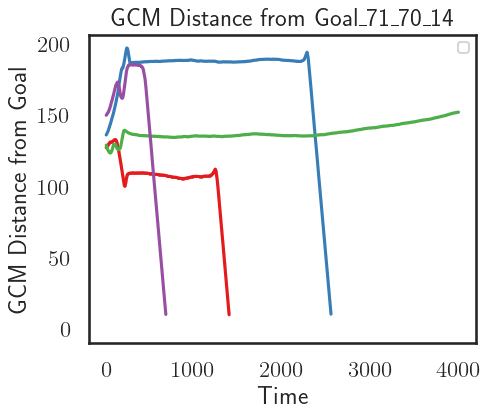

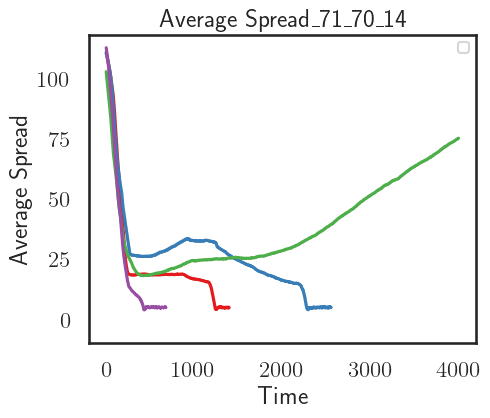

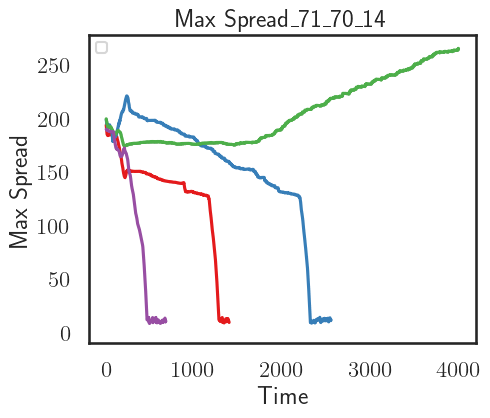

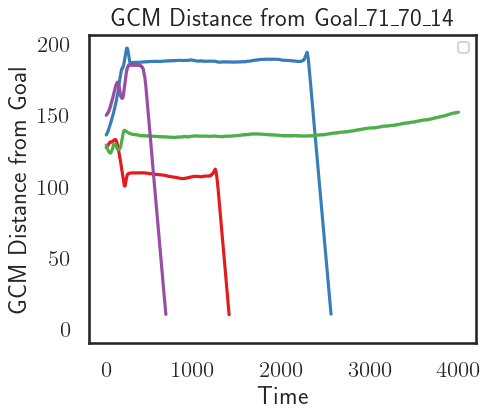

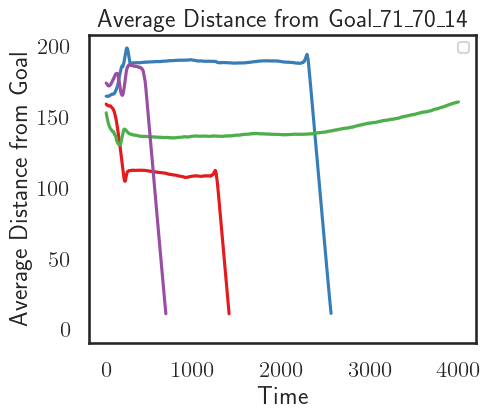

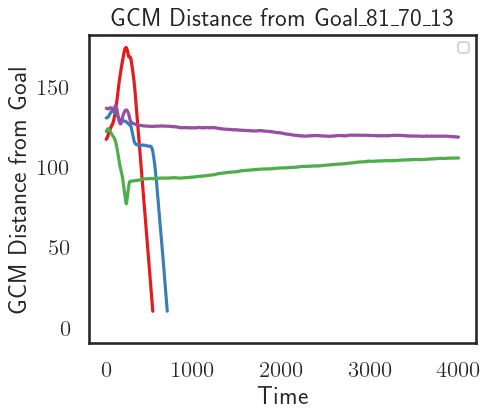

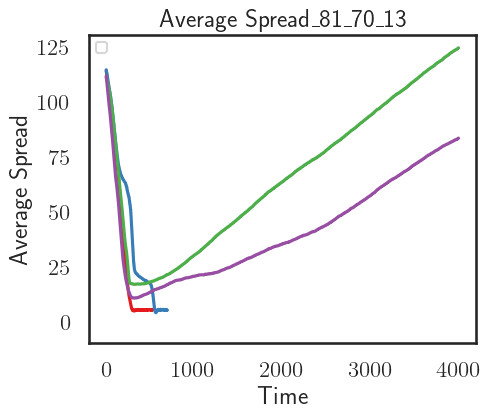

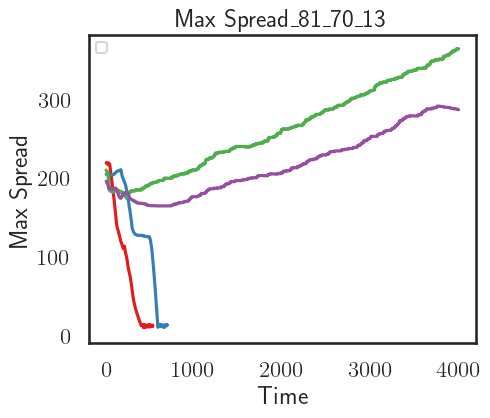

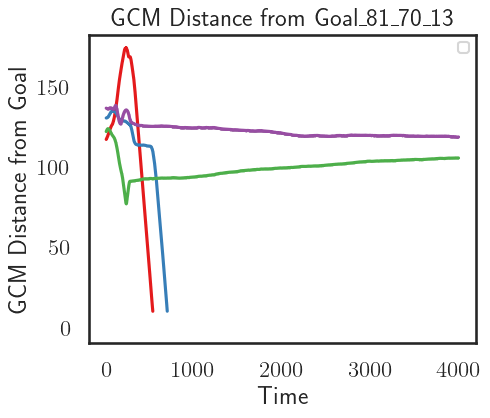

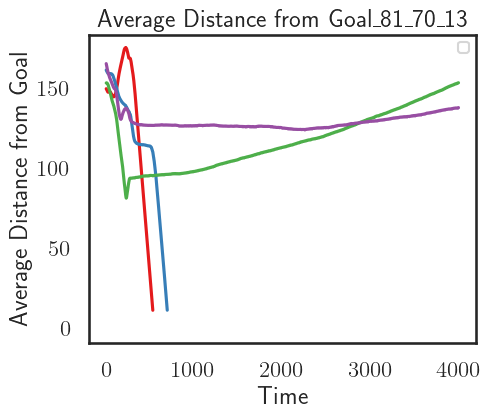

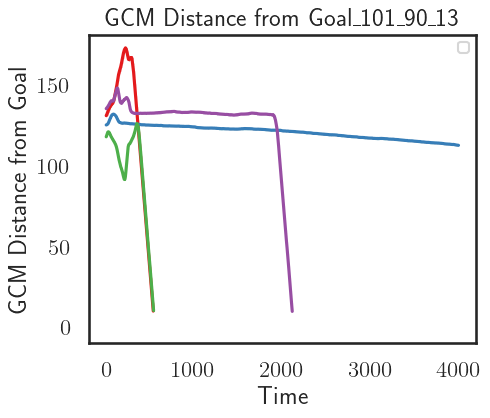

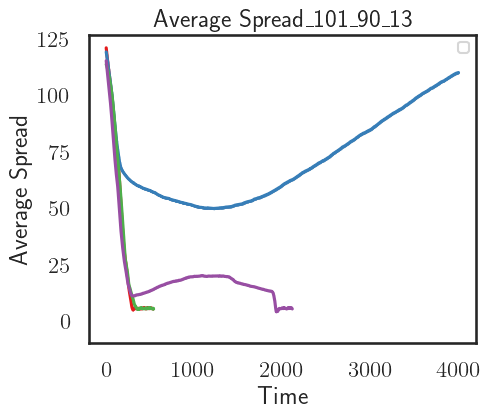

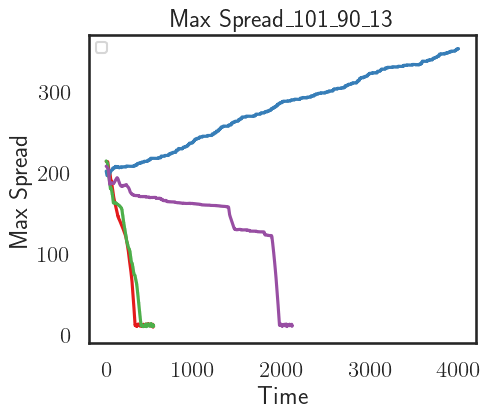

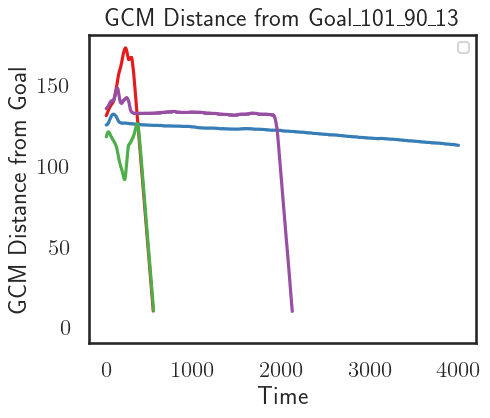

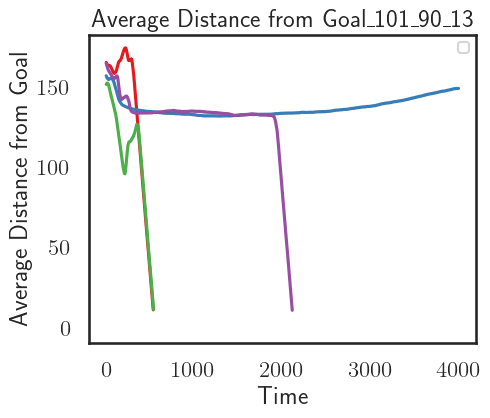

In [31]:
toPlotColumns = ["GCM Distance from Goal",'Average Spread', 'Max Spread', 'GCM Distance from Goal', 'Average Distance from Goal' ]

test = ["GCM Distance from Goal"]
for index, row in optimalDF.iterrows():
    for columnToBePlotted in toPlotColumns :
        if(row['num_shepherds'] < 16) :
            a = getGroupByIndex(tr,row['num_sheep'],row['num_neighbors'],row['num_shepherds'])
            plotFlowTimeGraph(a,row['num_sheep'],row['num_neighbors'],row['num_shepherds'],columnToBePlotted )

In [ ]:
print(fr2.head(10))

In [ ]:
fr2_win = fr2[fr2["Win?"] == True]

In [ ]:
tr_new = tr.reset_index(level=[4])

In [ ]:
onlywins = fr2_win.merge(tr_new, how='left', left_index=True, right_index=True)

In [ ]:
onlywins.head(10)

In [ ]:
def plotFlowTimeGraph_1(g, num_sheep, num_neighbors, num_shepherds, columnToBePlotted):
    #g = df.droplevel(level=[1])
    #print(g.head(10))
    unique_seeds = list(g.index.get_level_values('random_seed').unique())
    #print(g.columns)
    #print(unique_seeds)
    fig,ax = plt.subplots(figsize=(5, 4))
    for seed in unique_seeds:
        group = g.loc[seed]
        #print(group.head(10))
        #print(group['Tick'].min(), group['Tick'].max())
        ax.plot(group['Tick'], group[columnToBePlotted], marker= next(marker), markersize = 0.1)
    unique_name = columnToBePlotted+ "_" + str(num_sheep) + "_" + str(num_neighbors)+ "_" + str(num_shepherds) + "_win"
    saveFig(fig,ax,unique_name,"Time",columnToBePlotted,unique_name)



In [ ]:
toPlotColumns = ["GCM Distance from Goal",'Average Spread', 'Max Spread', 'GCM Distance from Goal', 'Average Distance from Goal' ]

test = ["GCM Distance from Goal"]
for index, row in optimalDF.iterrows():
    for columnToBePlotted in toPlotColumns :
        if(row['num_shepherds'] < 16) :
            a = getGroupByIndex(onlywins,row['num_sheep'],row['num_neighbors'],row['num_shepherds'])
            #print(a.index)
            #print(a.columns)
            plotFlowTimeGraph_1(a,row['num_sheep'],row['num_neighbors'],row['num_shepherds'],columnToBePlotted)

# 3D Plot and HeatMaps

In [32]:
# create 3D scatter plot
import plotly.graph_objs as go
df = fr_win_count
labels = df.index.get_level_values('num_sheep').astype(str) + ' Sheep, ' + df.index.get_level_values('num_shepherds').astype(str) + ' Shepherds, ' + df.index.get_level_values('num_neighbors').astype(str) + ' Neighbors'
fig = go.Figure(
    data=[go.Scatter3d(
        x=df.index.get_level_values('num_sheep'),
        y=df.index.get_level_values('num_shepherds'),
        z=df.index.get_level_values('num_neighbors'),
        mode='markers',
        marker=dict(
            size=df['Win?'],
            color=df['Win?'],
            colorscale='Viridis',
            opacity=0.7,
            colorbar=dict(title='Win')
        ),
        text=labels,
        hoverinfo='text',
    )],
    layout={"scene": {"camera": {"projection": {"type": "orthographic"}}}}
)

# set axis labels and title
fig.update_layout(scene=dict(
    xaxis_title='Num Sheep',
    yaxis_title='Num Shepherds',
    zaxis_title='Num Neighbors'
))
fig.show()

In [33]:
import seaborn as sns
new_order = [2,1,0]
fr_win_count = fr_win_count.reorder_levels(new_order)
#print(fr_win_count.index)

In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

MultiIndex([(  1,   1,  2, 96642),
            (  1,   1,  2, 28142),
            (  1,   1,  2, 27728),
            (  1,   1,  2,  4141),
            (  1,   1,  2, 28457),
            (  1,   1,  2, 94010),
            (  1,   1,  2, 26836),
            (  1,   1,  2, 51814),
            (  1,   1,  2, 21668),
            (  1,   1,  2, 75447),
            ...
            (101, 100, 16, 27728),
            (101, 100, 16,  4141),
            (101, 100, 16, 28457),
            (101, 100, 16, 94010),
            (101, 100, 16, 26836),
            (101, 100, 16, 51814),
            (101, 100, 16, 21668),
            (101, 100, 16, 75447),
            (101, 100, 16, 58114),
            (101, 100, 16, 48466)],
           names=['num_sheep', 'num_neighbors', 'num_shepherds', 'random_seed'], length=11880)


num_sheep      1    11        21        31   41   51   61   71   81   91   101
num_neighbors                                                                 
1              1.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
10             0.0  0.5  0.083333  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
20             0.0  0.0  0.250000  0.166667  0.0  0.0  0.0  0.0  0.0  0.0  0.0
30             0.0  0.0  0.000000  0.083333  0.0  0.0  0.0  0.0  0.0  0.0  0.0
40             0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
50             0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
60             0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
70             0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
80             0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
90             0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0

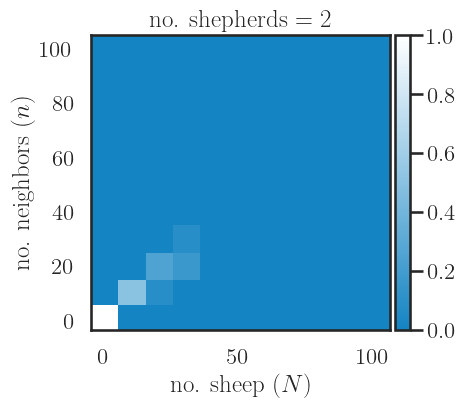

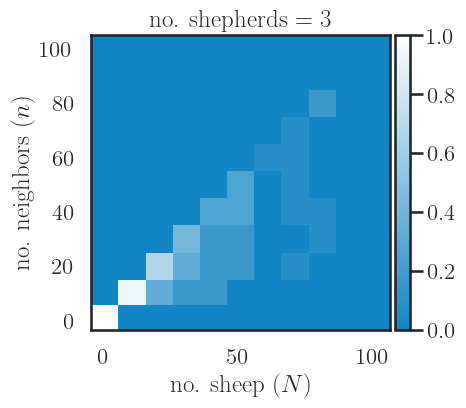

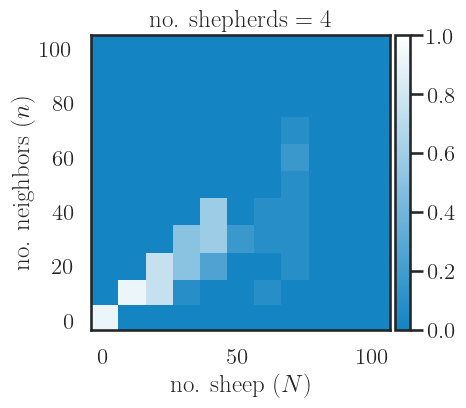

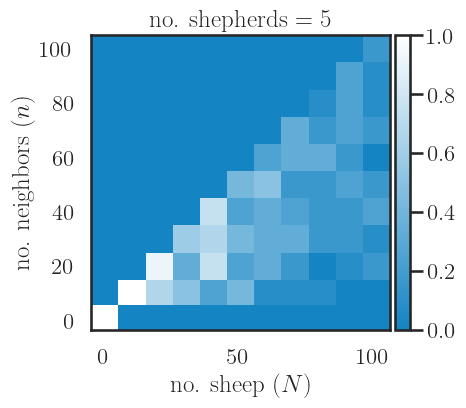

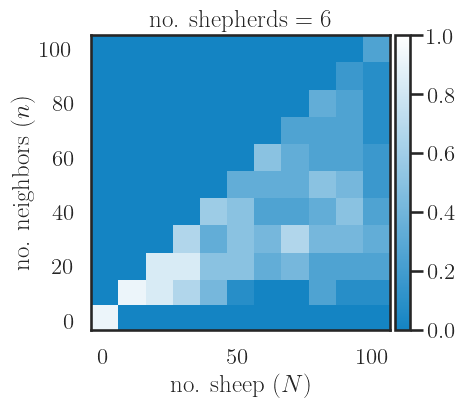

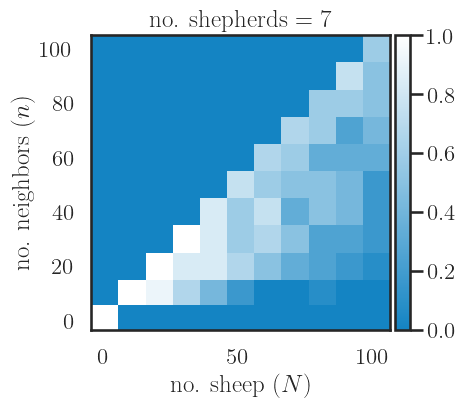

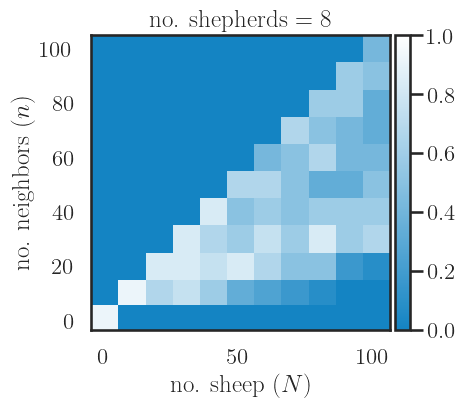

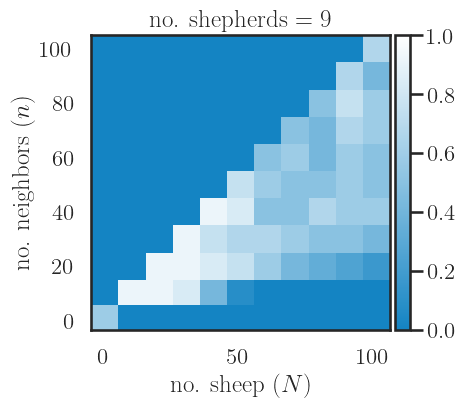

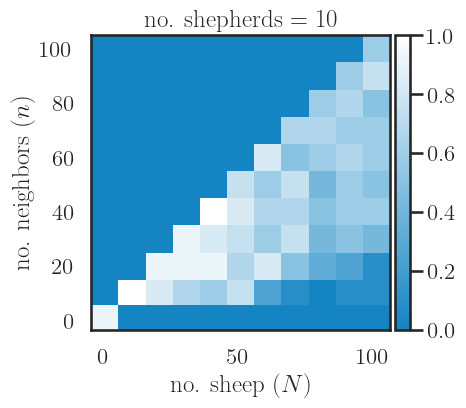

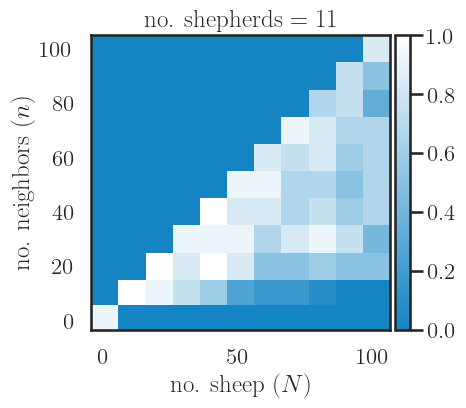

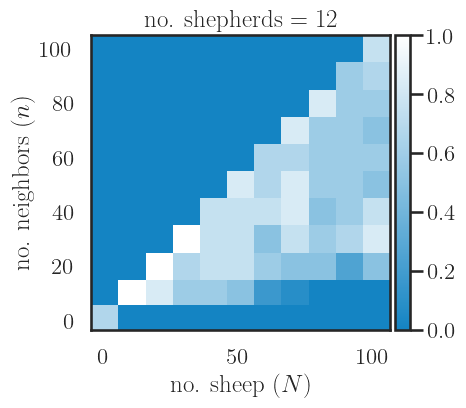

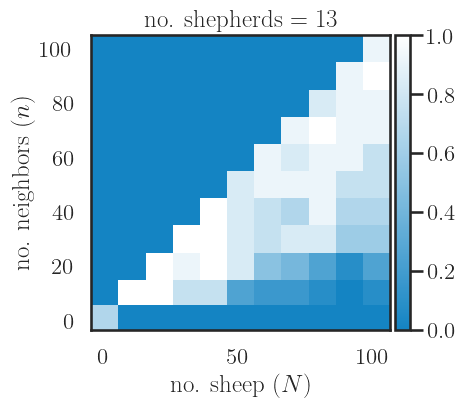

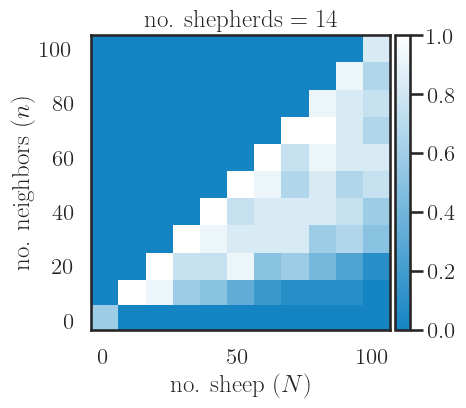

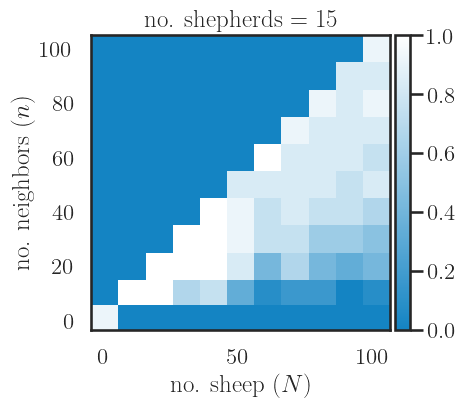

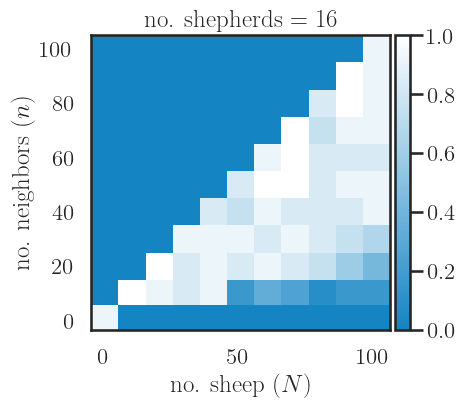

In [35]:
# iterate over each num_shepherds value and create heatmap
_, fr = pickle.loads(Path("data/final_results_12trials_radius75.pkl").read_bytes())
plt.rcParams.update({"text.usetex": True, "font.family": "Computer Modern Roman"})

print(fr.index)
for s in unique_shepherds:
    # subset dataframe for current shepherd value
    #print(shepherd)
    subset_df = fr.loc[:,:,s,:]
    #print(subset_df.index)
    # reshape dataframe to wide format for heatmap
    success_rate = (
        subset_df.groupby(["num_sheep", "num_neighbors"])
        .mean()["Win?"]
        .unstack(level=0, fill_value=0)
    )
    if s == 2:
        display(success_rate.head(10))
    fig, ax = plt.subplots(figsize=(5,5), )
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        "blue", ["#1484C3", "#FFFFFF"], N=256
    )
    plot = ax.pcolormesh(
        success_rate.columns,
        success_rate.index,
        success_rate.values,
        cmap=cmap,
        vmin=0,
        vmax=1,
    )
    ax.set_title(f"no. shepherds = {s}")
    colorbar(plot)
    ax.set_xlabel("no. sheep ($N$)")
    ax.set_ylabel("no. neighbors ($n$)")
    ax.set_aspect('equal')
    fig.tight_layout()
    fig.savefig(f"success_heatmap_shepherds{s:03d}.png", dpi=300)

    #plt.show()